
# **MIS710 Assignment 2**
- Name: Duong Ngoc Phuong Trang
- ID: 223990468




# **1. Import libraries and functions**

In [ ]:
# import libraries
import pandas as pd #for data manipulation and analysis
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


# **2. Model One: K-nn**




## **2.1. Loading data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load dataset
records = pd.read_csv("/GOBank.csv")

In [ ]:
#loading data

records.head()

,CustomerID,Age,Qualification,Occupation,Marital Status,Home Mortgage,Personal Loan,Has Other Bank Account,Last Contact Direction,Last Contact Duration,Last Contact Month,Last Contact Weekday,Number of Current Campaign Calls,Number of Previous Campaign Calls,Previous Campaign Outcome,RBA Cash Rate,Employment Variation Rate,Consumer Confidence Index,Sale Outcome
0,CU318939,32,Graduate Diploma and Graduate Certificate,Technicians and Trades,Married,Yes,No,No,Inbound,172.0,July,Wednesday,2,0.0,Nonexistent,4.963,1.4,93.918,No Sale
1,CU935403,39,Bachelor Degree Level or Higher,Clerical and administrative,Married,No,No,No,Outbound,744.0,May,Monday,6,0.0,Nonexistent,4.857,1.1,93.994,Sale
2,CU792919,36,Graduate Diploma and Graduate Certificate,Technicians and Trades,Divorced,No,No,No,Inbound,31.0,May,Thursday,1,0.0,Nonexistent,1.327,-1.8,92.893,No Sale
3,CU168904,44,Primary Education,Labourer,Married,Yes,No,No,Inbound,102.0,May,Thursday,1,0.0,Nonexistent,1.327,-1.8,92.893,No Sale
4,CU442580,38,Graduate Diploma and Graduate Certificate,Technicians and Trades,Married,No,No,No,Outbound,436.0,May,Thursday,1,0.0,Nonexistent,4.860,1.1,93.994,No Sale


## **2.2. Data Preparation, Exploration and Visualisation**

### **Data cleansing**




In [ ]:
##write your code to inspect columns and data types to print the following outcome
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22940 entries, 0 to 22939
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CustomerID                         22940 non-null  object 
 1   Age                                22940 non-null  int64  
 2   Qualification                      22778 non-null  object 
 3   Occupation                         22940 non-null  object 
 4   Marital Status                     22940 non-null  object 
 5   Home Mortgage                      22940 non-null  object 
 6   Personal Loan                      22940 non-null  object 
 7   Has Other Bank Account             22940 non-null  object 
 8   Last Contact Direction             22893 non-null  object 
 9   Last Contact Duration              22799 non-null  float64
 10  Last Contact Month                 22940 non-null  object 
 11  Last Contact Weekday               22940 non-null  obj

In [ ]:
##write your code to inspect missing data
records.isnull().sum()

CustomerID                             0
Age                                    0
Qualification                        162
Occupation                             0
Marital Status                         0
Home Mortgage                          0
Personal Loan                          0
Has Other Bank Account                 0
Last Contact Direction                47
Last Contact Duration                141
Last Contact Month                     0
Last Contact Weekday                   0
Number of Current Campaign Calls       0
Number of Previous Campaign Calls     26
Previous Campaign Outcome            206
RBA Cash Rate                          0
Employment Variation Rate              0
Consumer Confidence Index              0
Sale Outcome                           0
dtype: int64

In [ ]:
##write your code to remove customer IDs from the data set
records = records.drop(['CustomerID'], axis = 1)

In [ ]:
#As the distribution is skewed, replace the missing values with median
records['Qualification'].fillna(records['Qualification'].mode()[0],inplace=True)
records['Last Contact Direction'].fillna(records['Last Contact Direction'].mode()[0],inplace=True)
records['Last Contact Duration'].fillna(records['Last Contact Duration'].median(),inplace=True)
records['Number of Previous Campaign Calls'].fillna(records['Number of Previous Campaign Calls'].median(),inplace=True)
records['Previous Campaign Outcome'].fillna(records['Previous Campaign Outcome'].mode()[0],inplace=True)

In [ ]:
#set the formatting for floating numbers
pd.set_option('display.float_format', lambda x: '%.3f' % x)

data_types =['object', 'float', 'int']
records.describe(include=data_types)

,Age,Qualification,Occupation,Marital Status,Home Mortgage,Personal Loan,Has Other Bank Account,Last Contact Direction,Last Contact Duration,Last Contact Month,...,RBA Cash Rate,Employment Variation Rate,Consumer Confidence Index,Sale Outcome,Sale Outcome_num,Occupation_num,Has Other Bank Account_num,Last Contact Direction_num,Last Contact Month_num,Previous Campaign Outcome_num
count,22940.000,22940,22940,22940,22940,22940,22940,22940,22940.000,22940,...,22940.000,22940.000,22940.000,22940,22940.000,22940.000,22940.000,22940.000,22940.000,22940.000
unique,NaN,6,12,4,3,3,2,2,NaN,10,...,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Primary Education,Clerical and administrative,Married,Yes,No,No,Inbound,NaN,May,...,NaN,NaN,NaN,No Sale,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,6996,5850,13804,12086,18877,18378,14904,NaN,7442,...,NaN,NaN,NaN,18677,NaN,NaN,NaN,NaN,NaN,NaN
mean,40.098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,281.823,NaN,...,3.496,-0.028,93.557,NaN,0.186,1.889,0.199,0.650,0.734,1.746
std,10.799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285.376,NaN,...,1.786,1.619,0.592,NaN,0.389,0.338,0.399,0.477,0.693,0.630
min,17.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,...,0.634,-3.400,92.201,NaN,0.000,0.000,0.000,0.000,0.000,0.000
25%,32.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.000,NaN,...,1.313,-1.800,93.075,NaN,0.000,2.000,0.000,0.000,0.000,2.000
50%,38.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.000,NaN,...,4.857,1.100,93.444,NaN,0.000,2.000,0.000,1.000,1.000,2.000
75%,47.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,348.000,NaN,...,4.961,1.400,93.994,NaN,0.000,2.000,0.000,1.000,1.000,2.000


### **EDA**

1. Univariate analysis
2. Bivariate analysis
3. Multivariate analysis


**Inspect target variable**

In [ ]:
##write your code to inspect target variable
print(records['Sale Outcome'].value_counts())
print('Sale Outcome mode: ', records['Sale Outcome'].mode())

Sale Outcome
No Sale    18677
Sale        4263
Name: count, dtype: int64
Sale Outcome mode:  0    No Sale
Name: Sale Outcome, dtype: object


<Axes: xlabel='Sale Outcome', ylabel='count'>

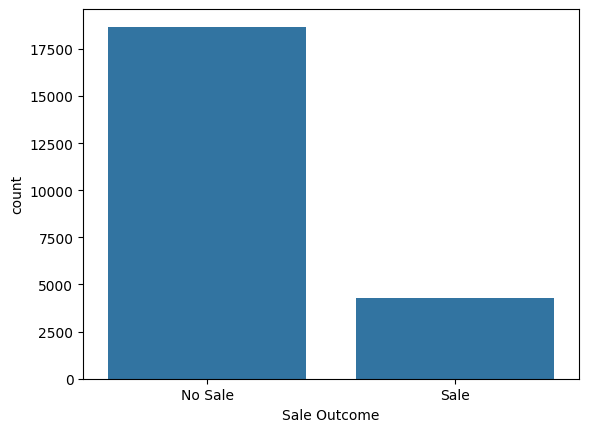

In [ ]:
sns.countplot(data=records, x='Sale Outcome')

**Univariate analysis**

**Examine categorial variables**

In [ ]:
#overview of numeric data
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22940 entries, 0 to 22939
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                22940 non-null  int64  
 1   Qualification                      22940 non-null  object 
 2   Occupation                         22940 non-null  object 
 3   Marital Status                     22940 non-null  object 
 4   Home Mortgage                      22940 non-null  object 
 5   Personal Loan                      22940 non-null  object 
 6   Has Other Bank Account             22940 non-null  object 
 7   Last Contact Direction             22940 non-null  object 
 8   Last Contact Duration              22940 non-null  float64
 9   Last Contact Month                 22940 non-null  object 
 10  Last Contact Weekday               22940 non-null  object 
 11  Number of Current Campaign Calls   22940 non-null  int

Qualification :

Qualification
Primary Education                            6996
Bachelor Degree Level or Higher              6815
High School Certificate                      5198
Graduate Diploma and Graduate Certificate    2934
Prefer not to say                             982
Pre-Primary Education                          15
Name: count, dtype: int64




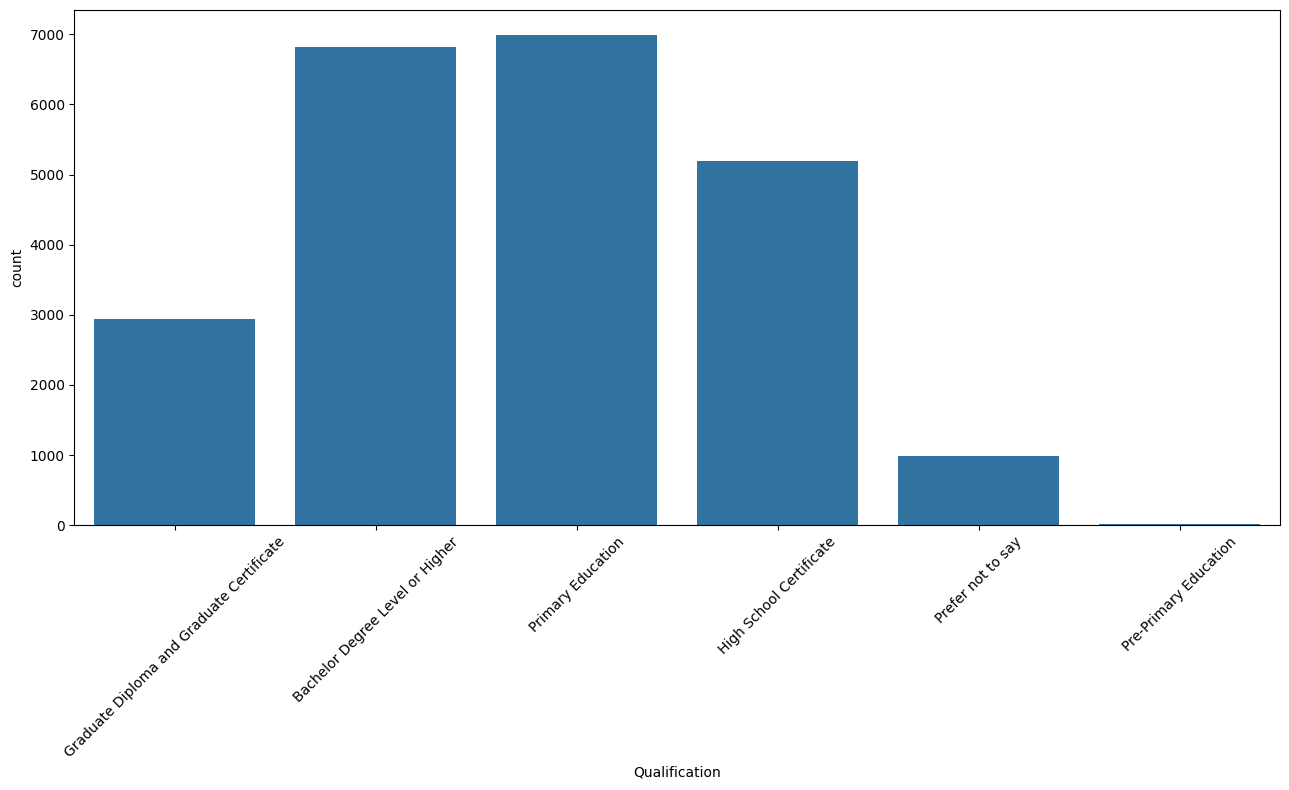

Occupation :

Occupation
Clerical and administrative       5850
Labourer                          5036
Technicians and Trades            3726
Community and personal service    2169
Manager                           1642
Retired                           1086
Entrepreneur                       813
Self-employed                      749
Housekeeper                        593
Student                            558
Unemployed                         536
Prefer not to say                  182
Name: count, dtype: int64




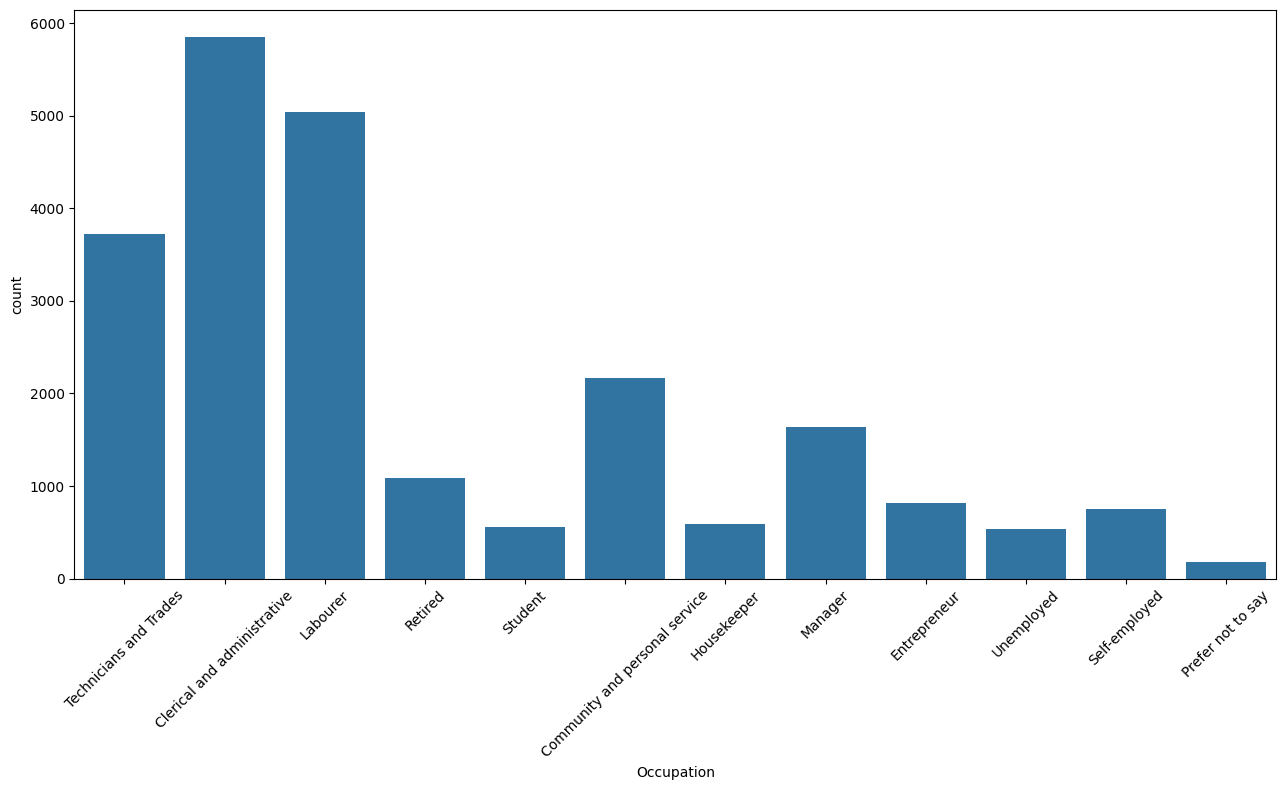

Marital Status :

Marital Status
Married              13804
Single                6526
Divorced              2559
Prefer not to say       51
Name: count, dtype: int64




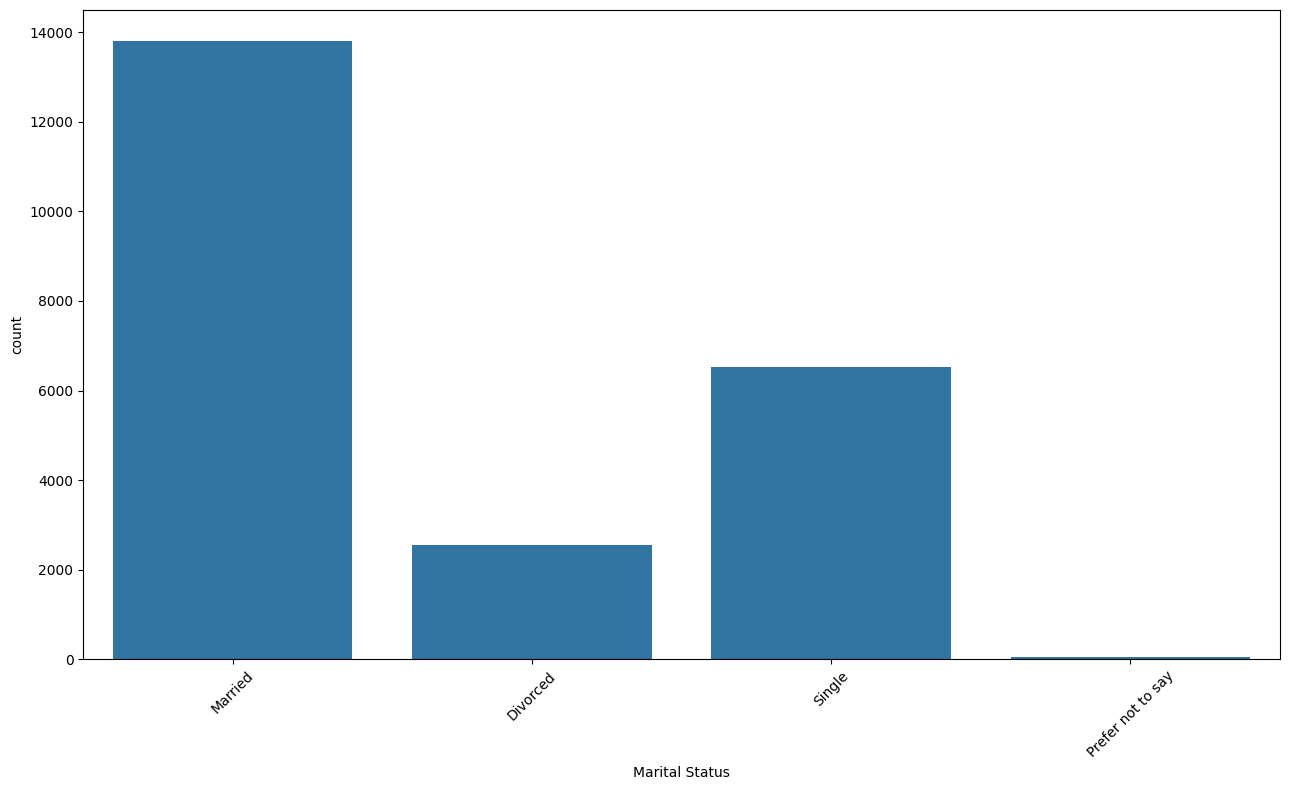

Home Mortgage :

Home Mortgage
Yes        12086
No         10284
Unknown      570
Name: count, dtype: int64




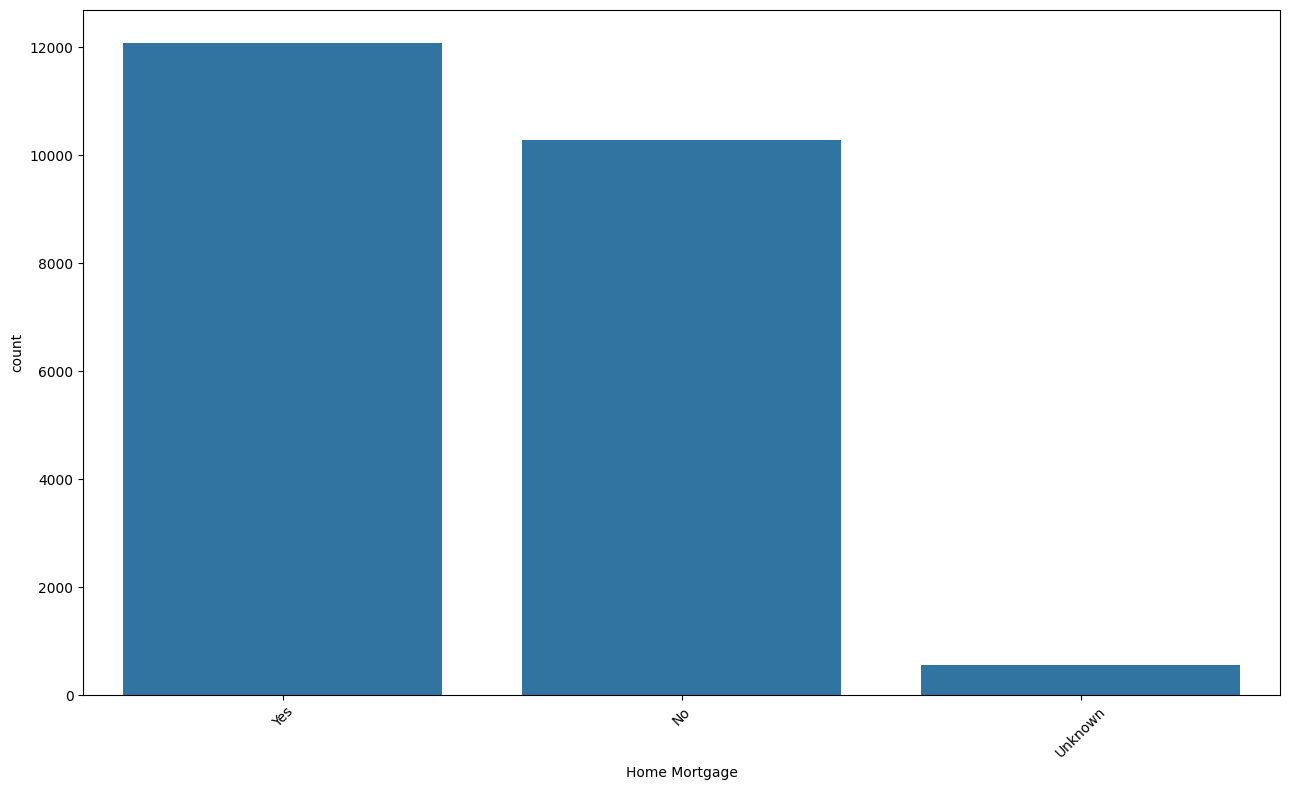

Personal Loan :

Personal Loan
No         18877
Yes         3493
Unknown      570
Name: count, dtype: int64




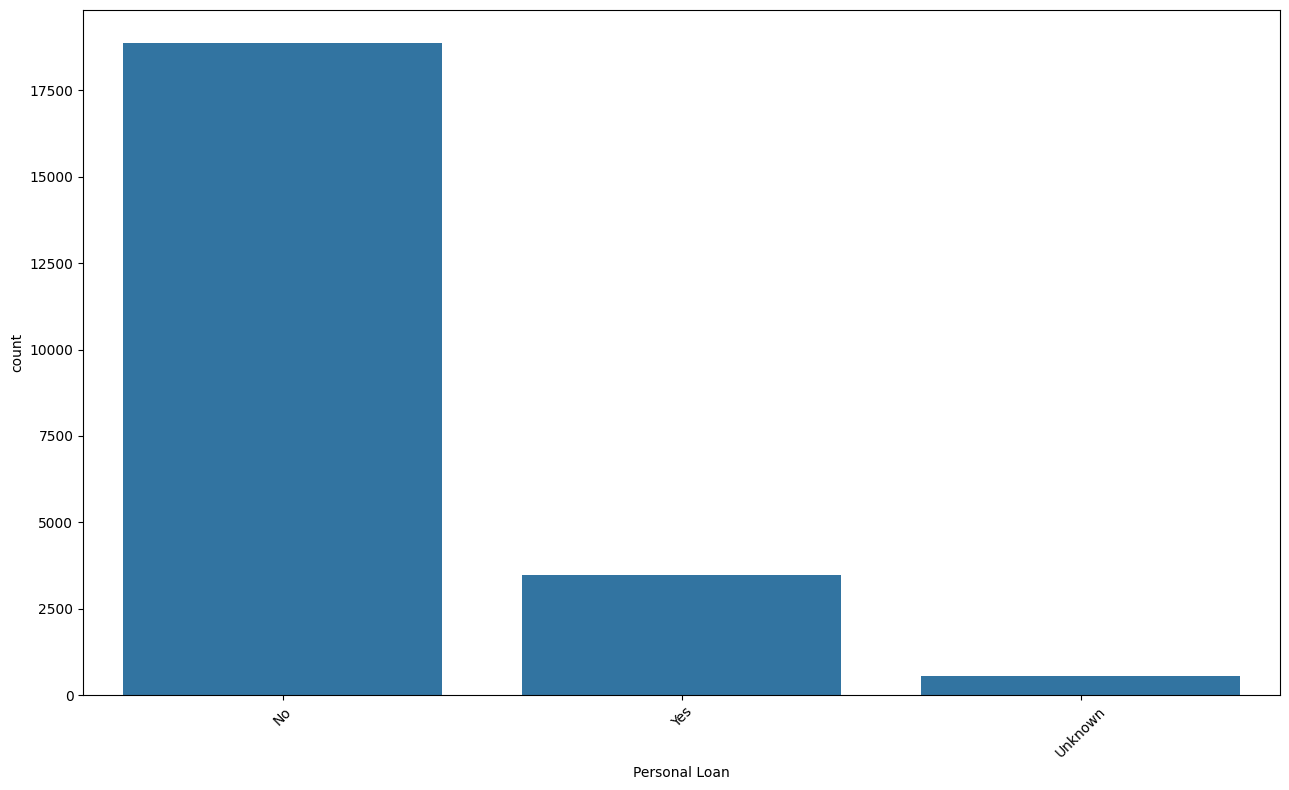

Has Other Bank Account :

Has Other Bank Account
No     18378
Yes     4562
Name: count, dtype: int64




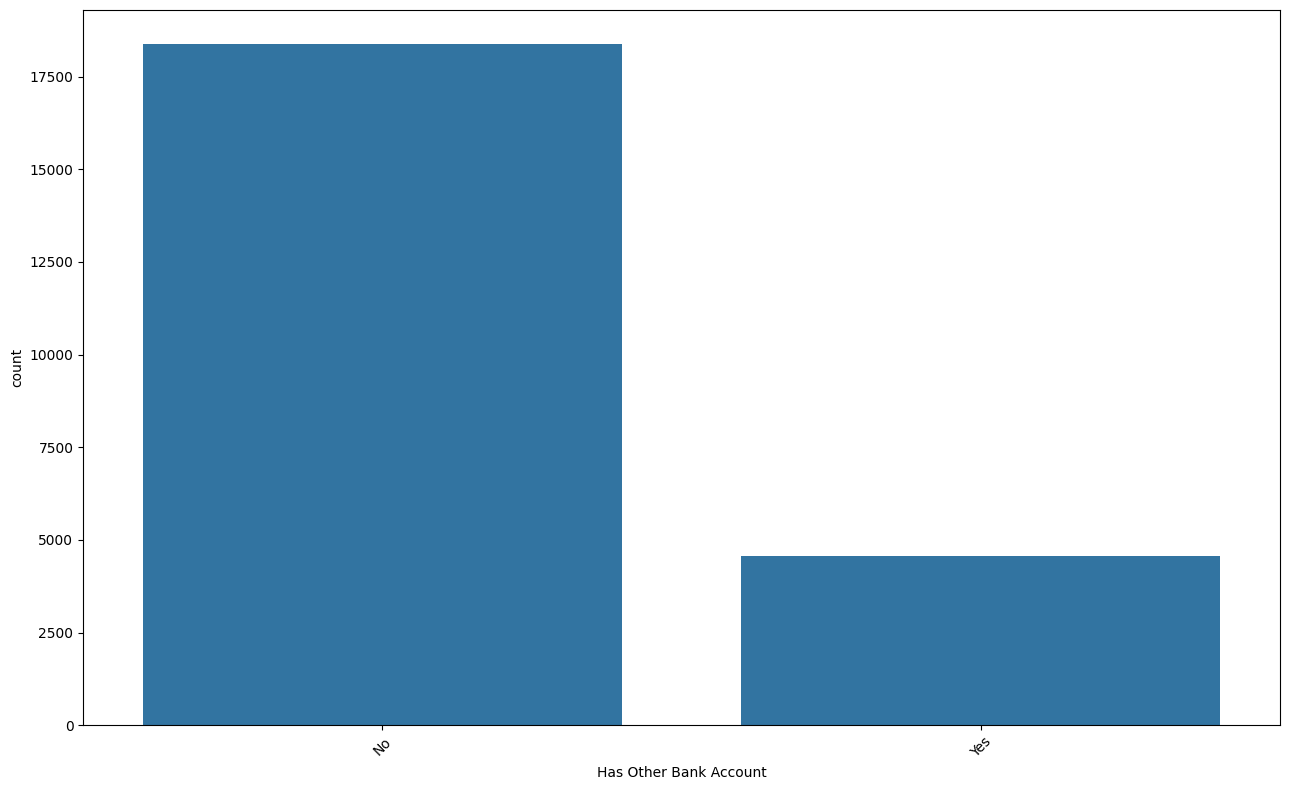

Last Contact Direction :

Last Contact Direction
Inbound     14904
Outbound     8036
Name: count, dtype: int64




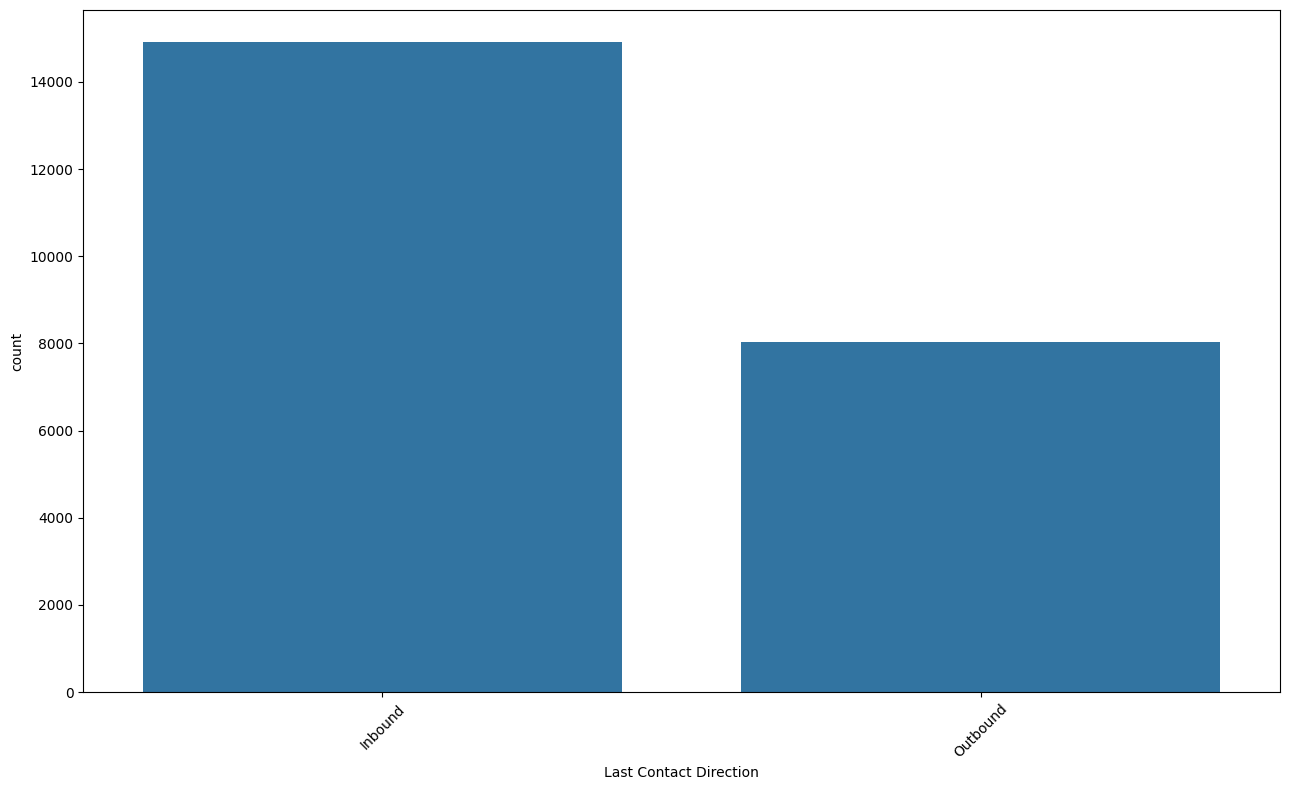

Last Contact Month :

Last Contact Month
May          7442
July         3919
August       3449
June         2937
November     2239
April        1534
October       509
September     393
March         389
December      129
Name: count, dtype: int64




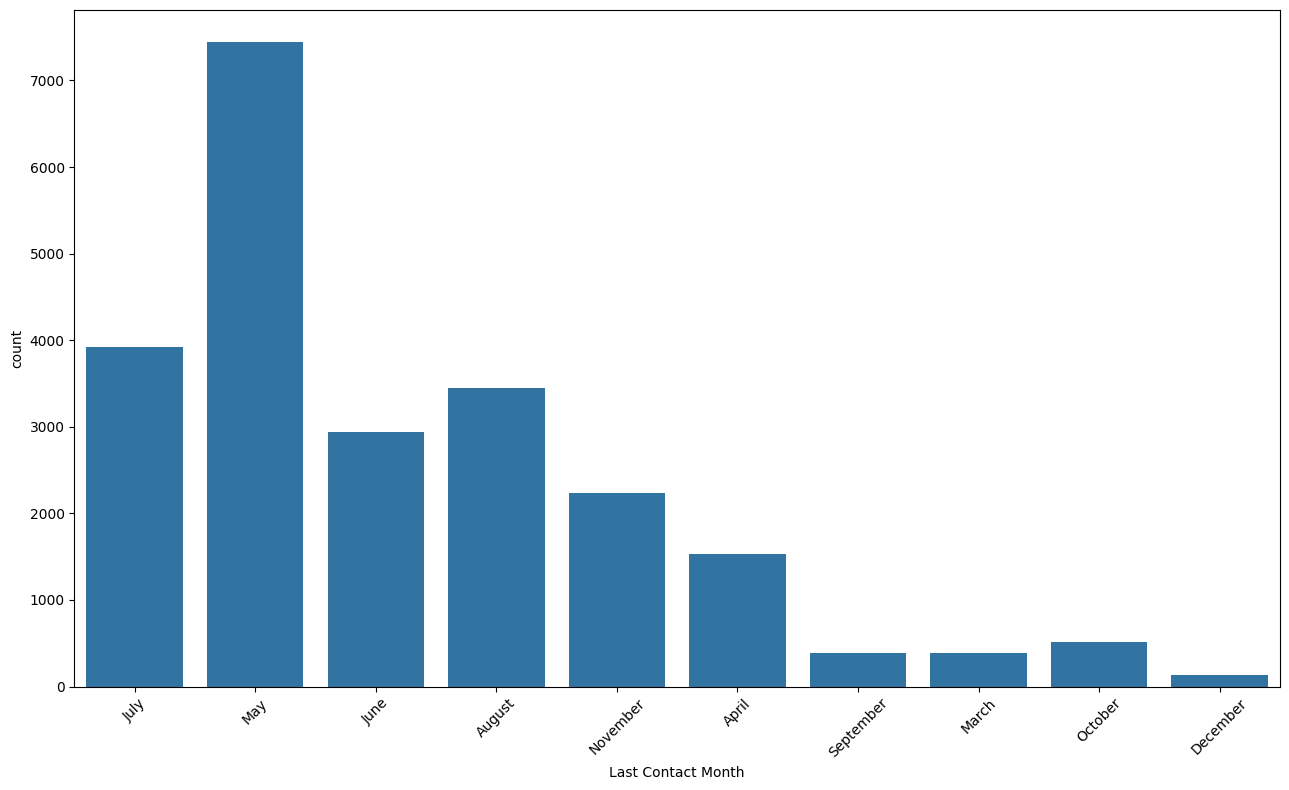

Last Contact Weekday :

Last Contact Weekday
Thursday     4812
Monday       4723
Wednesday    4567
Tuesday      4525
Friday       4313
Name: count, dtype: int64




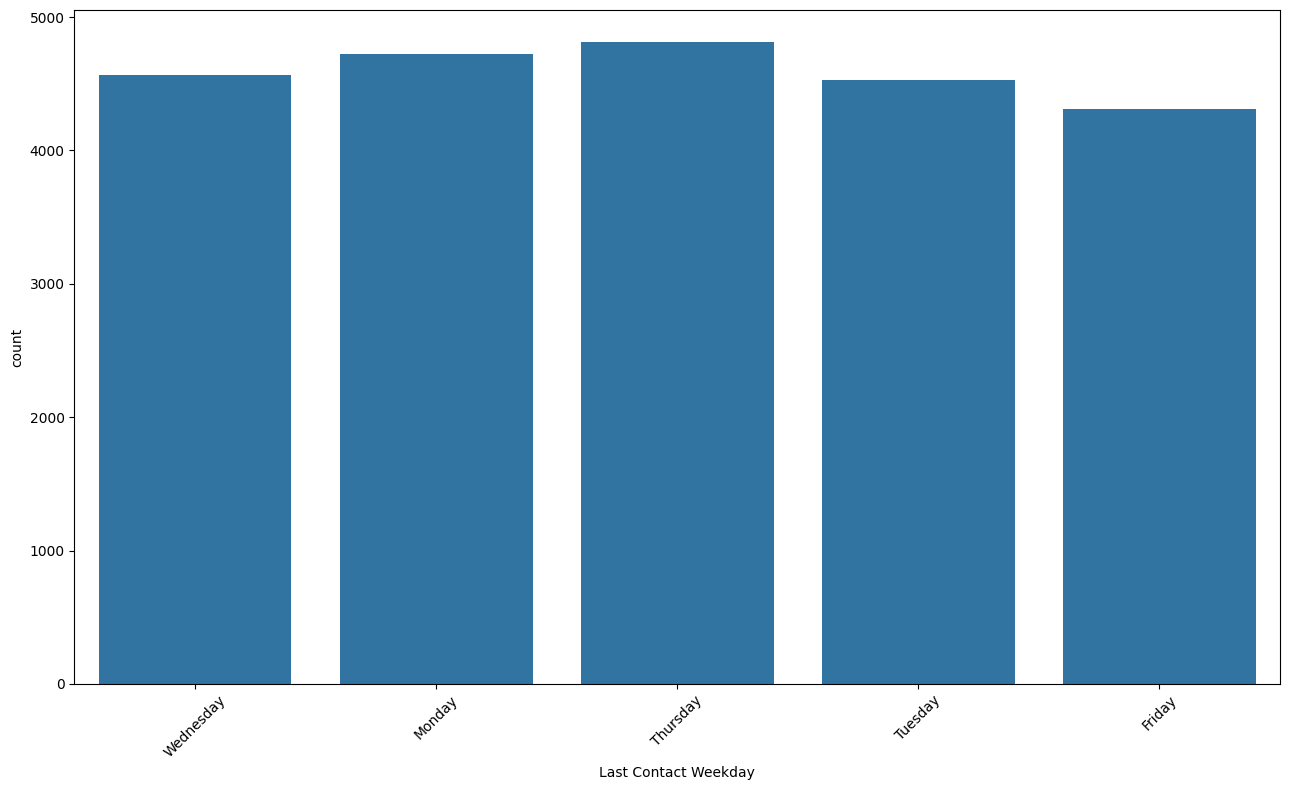

Previous Campaign Outcome :

Previous Campaign Outcome
Nonexistent    19505
No Sale         2381
Sale            1054
Name: count, dtype: int64




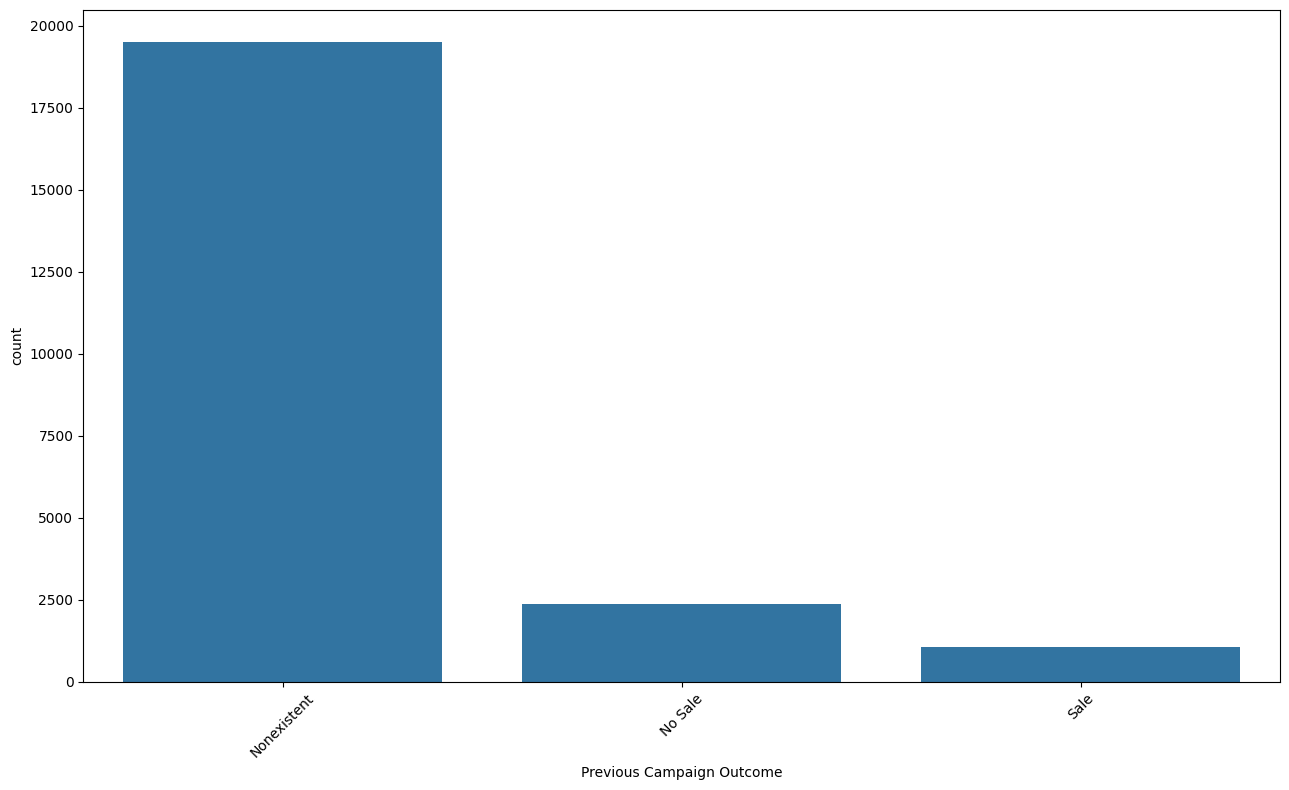

In [ ]:
#List the categorical variables and print value_counts and countplots
Categorical_data=['Qualification','Occupation','Marital Status','Home Mortgage','Personal Loan','Has Other Bank Account','Last Contact Direction','Last Contact Month','Last Contact Weekday','Previous Campaign Outcome']
for i in Categorical_data:
   print(i, ':\n')
   print(records[i].value_counts())
   print('\n')
   plt.figure(figsize=(13,8))
   sns.countplot(x=records[i])
   # Rotate the x-labels by 45 degrees
   plt.xticks(rotation=45)

    # Optionally, you can adjust the labels further
   plt.tight_layout()
   plt.show()

**Examine numeric variables**

Age :

count    22940.000000
mean        40.097602
std         10.799192
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: Age, dtype: float64




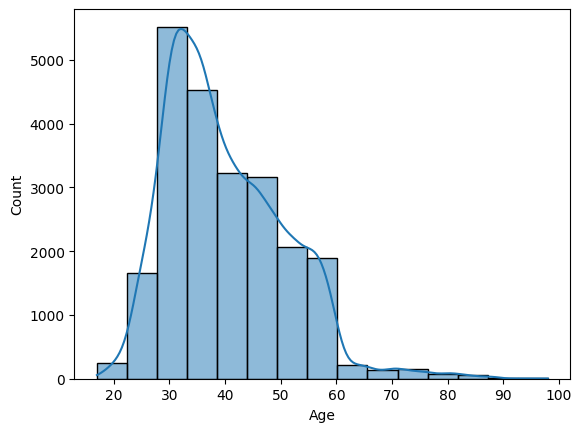

Last Contact Duration :

count    22940.000000
mean       281.823147
std        285.375802
min          0.000000
25%        108.000000
50%        192.000000
75%        348.000000
max       4918.000000
Name: Last Contact Duration, dtype: float64




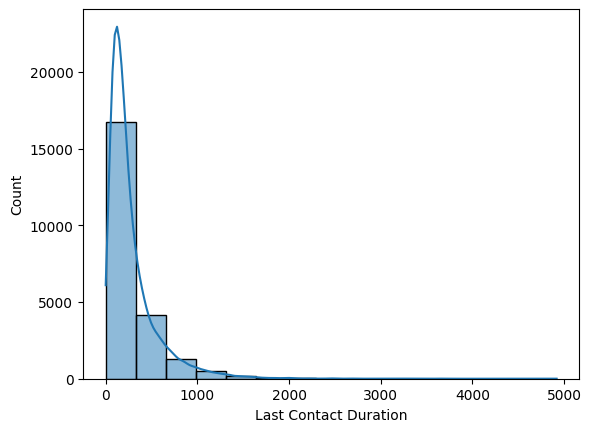

Number of Current Campaign Calls :

count    22940.000000
mean         2.542938
std          2.702480
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: Number of Current Campaign Calls, dtype: float64




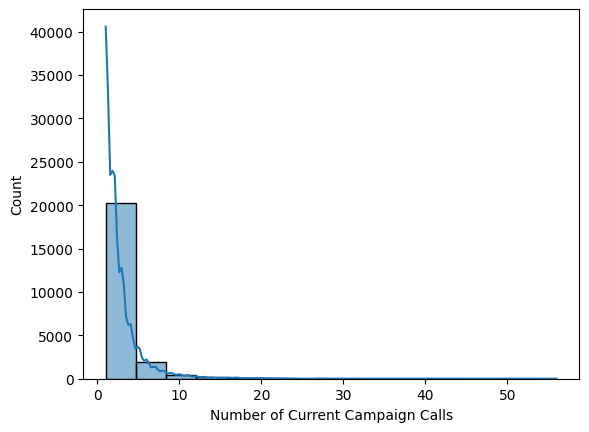

Number of Previous Campaign Calls :

count    22940.000000
mean         0.199215
std          0.543082
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          6.000000
Name: Number of Previous Campaign Calls, dtype: float64




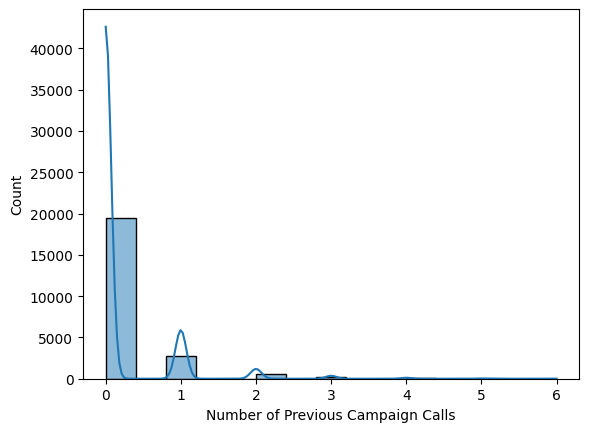

RBA Cash Rate :

count    22940.000000
mean         3.495762
std          1.785776
min          0.634000
25%          1.313000
50%          4.857000
75%          4.961000
max          5.045000
Name: RBA Cash Rate, dtype: float64




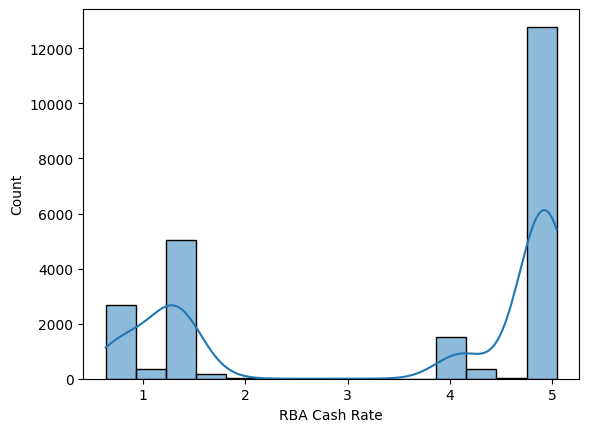

Employment Variation Rate :

count    22940.000000
mean        -0.027541
std          1.619152
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: Employment Variation Rate, dtype: float64




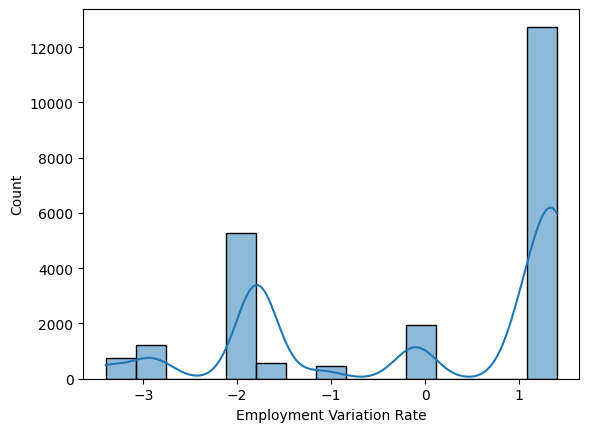

Consumer Confidence Index :

count    22940.000000
mean        93.557365
std          0.592104
min         92.201000
25%         93.075000
50%         93.444000
75%         93.994000
max         94.767000
Name: Consumer Confidence Index, dtype: float64




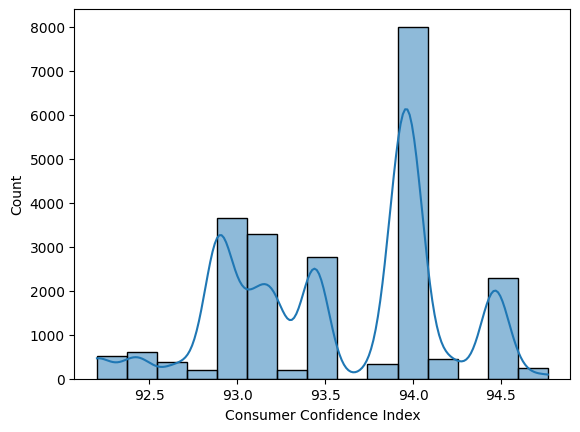

In [ ]:
Numerical_data=['Age', 'Last Contact Duration', 'Number of Current Campaign Calls', 'Number of Previous Campaign Calls', 'RBA Cash Rate', 'Employment Variation Rate', 'Consumer Confidence Index']
for i in Numerical_data:
   print(i, ':\n')
   print(records[i].describe())
   print('\n')
   sns.histplot(data=records, x=i, bins = 15, kde=True)
   #sns.boxplot(x=records[i], showmeans=True)
   plt.show()


**Explore binary relationships**

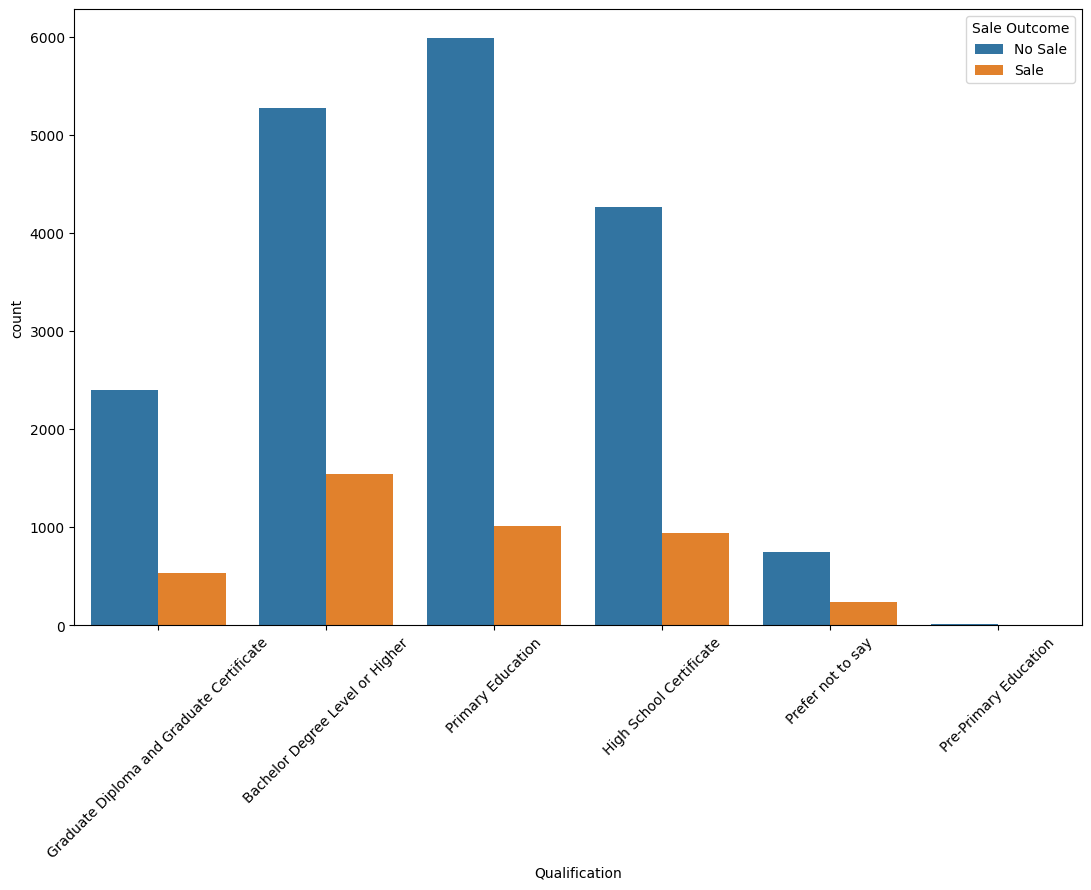

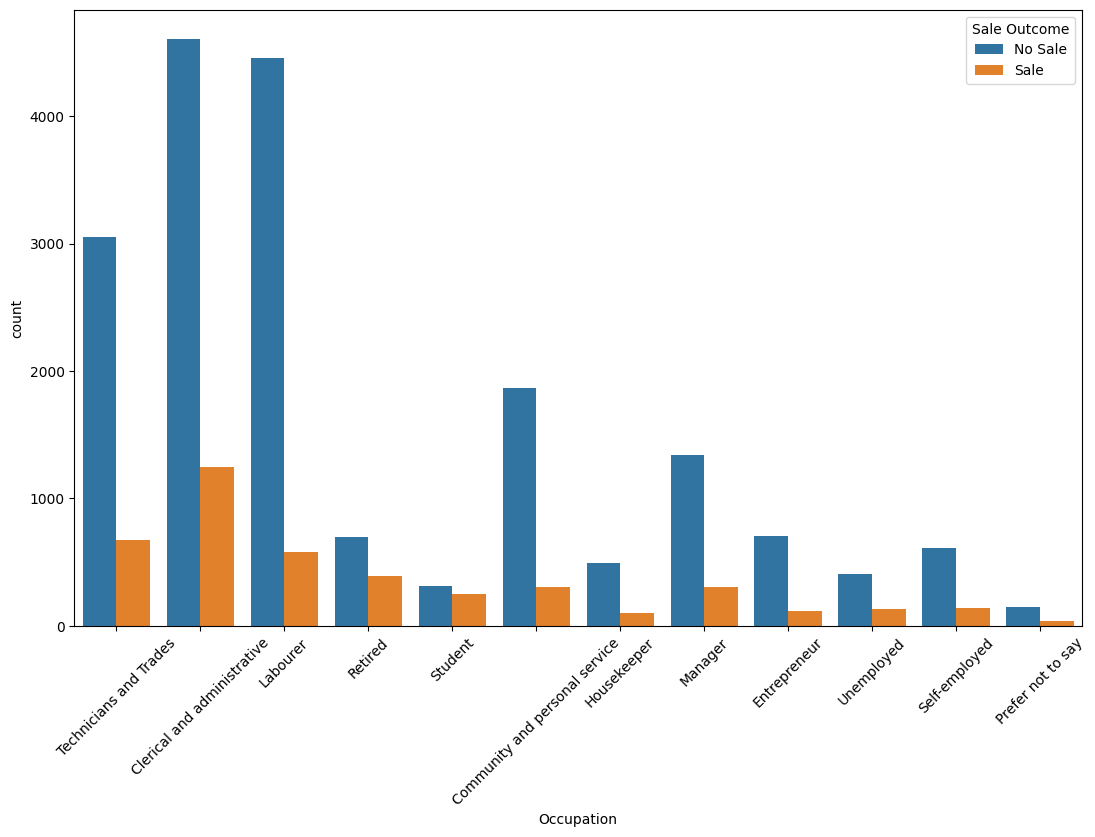

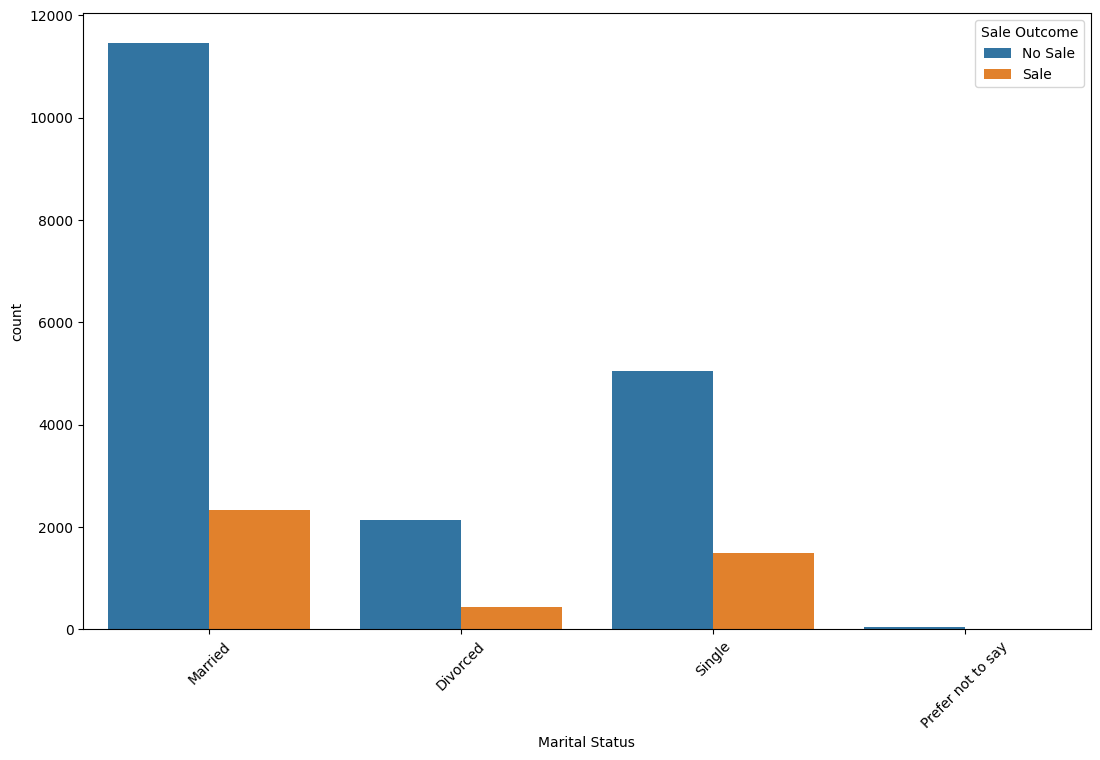

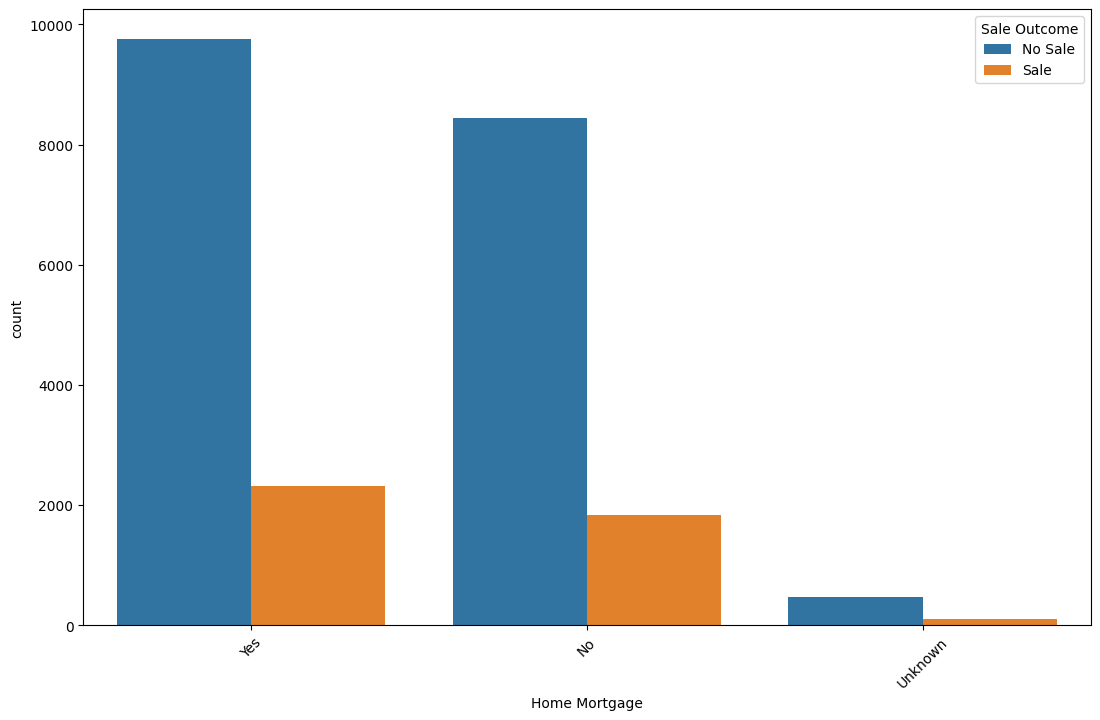

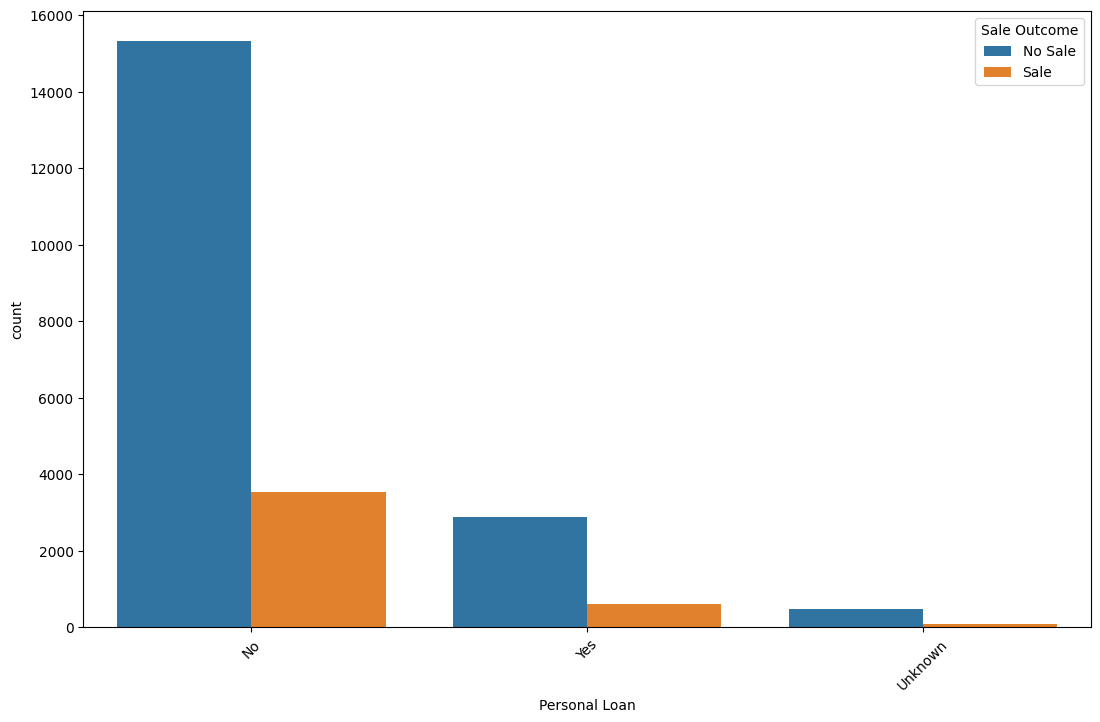

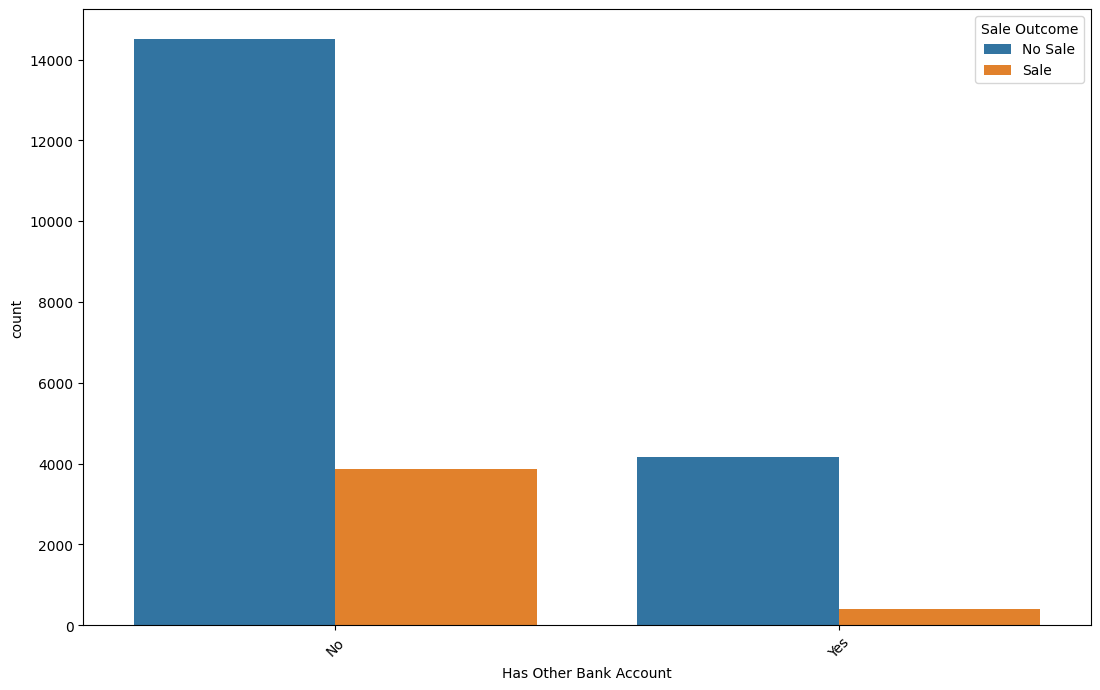

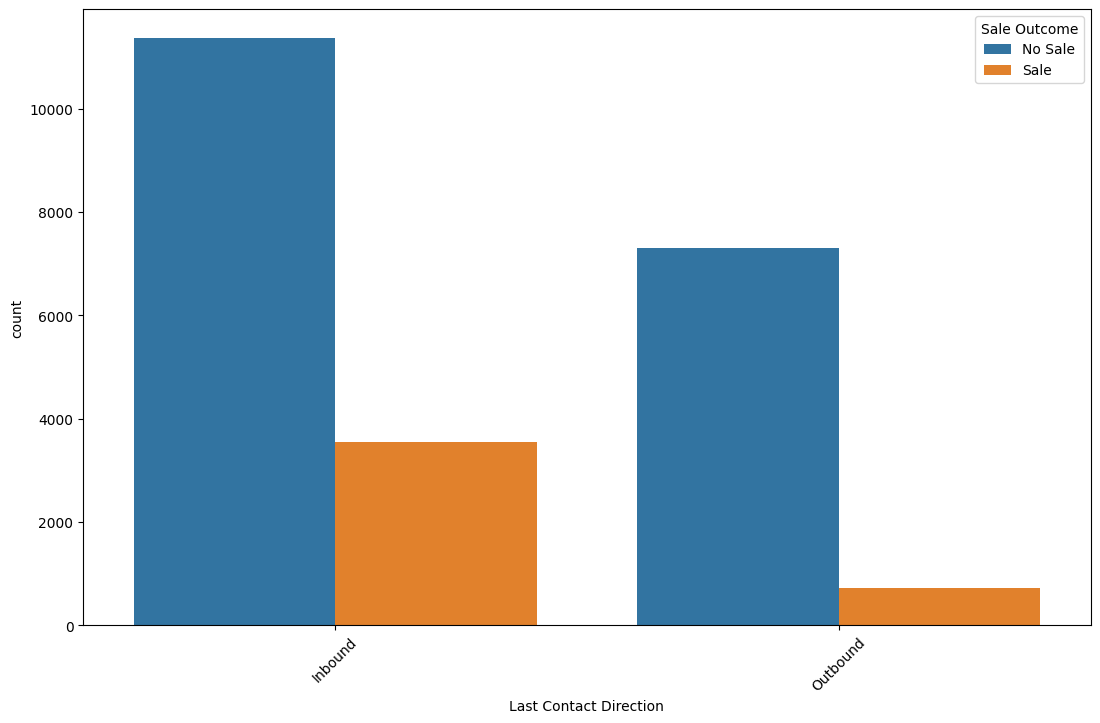

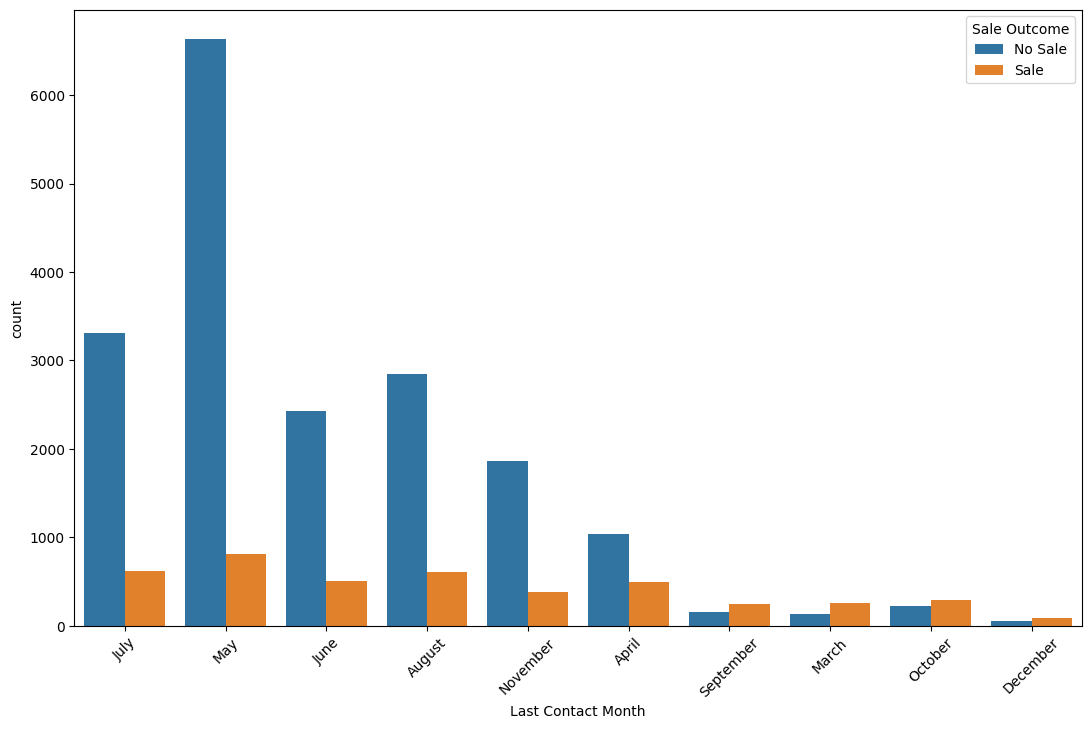

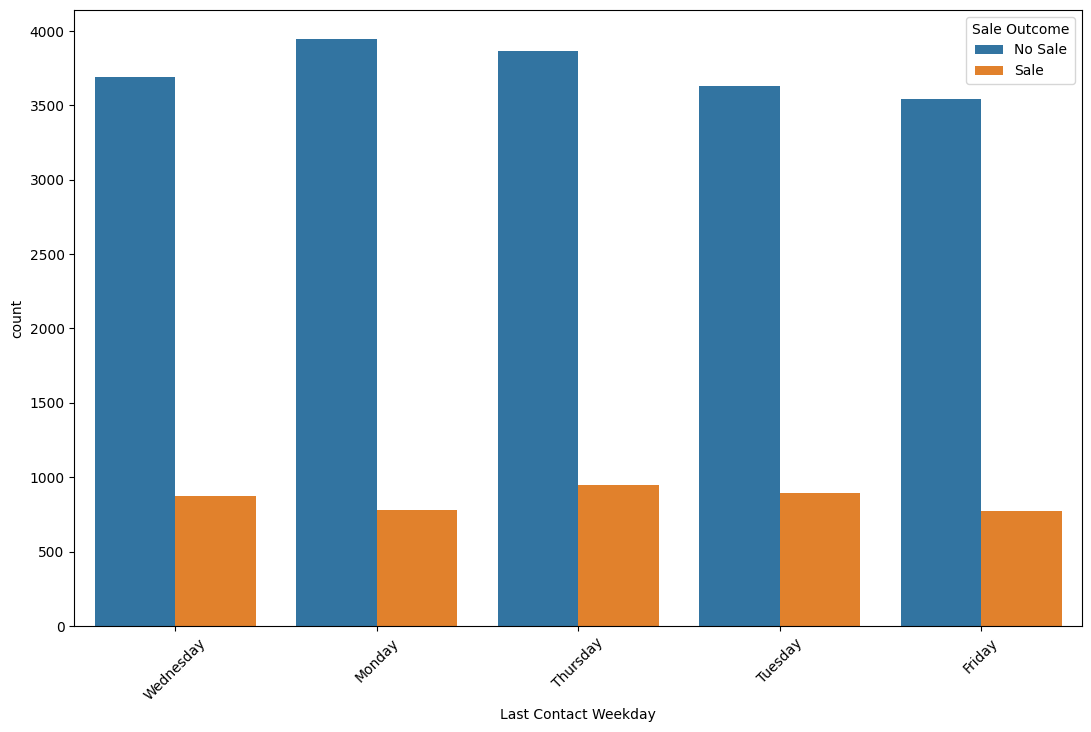

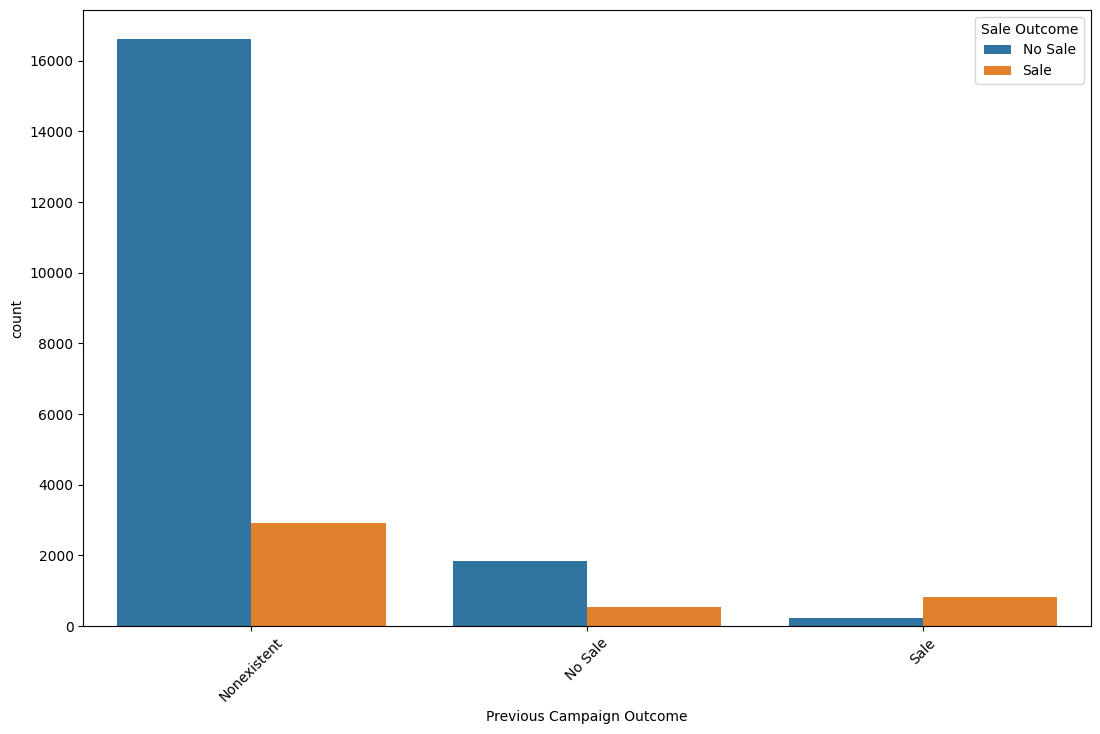

In [ ]:
#explore relationships between each categorical variable and the target one
for i in Categorical_data:
   plt.figure(figsize=(13,8))
   sns.countplot(x=records[i], hue=records['Sale Outcome'])
   plt.xticks(rotation=45)
   plt.show()


#I choose 5 categorical attributes:
- Occupation
- Has Other Bank Account
- Last Contact Direction
- Last Contact Month
- Previous Campaign Outcome

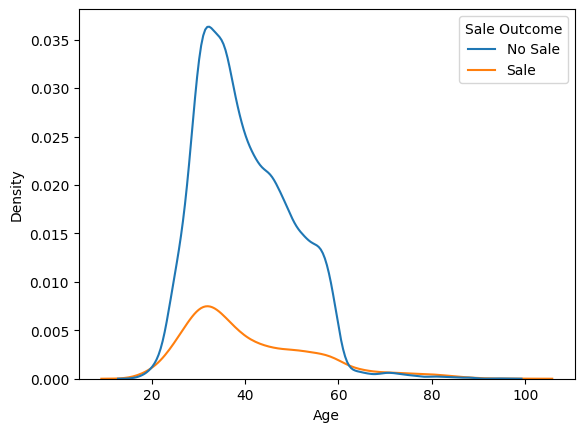

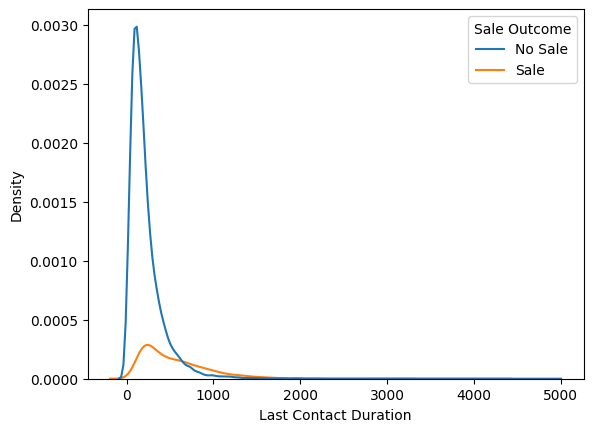

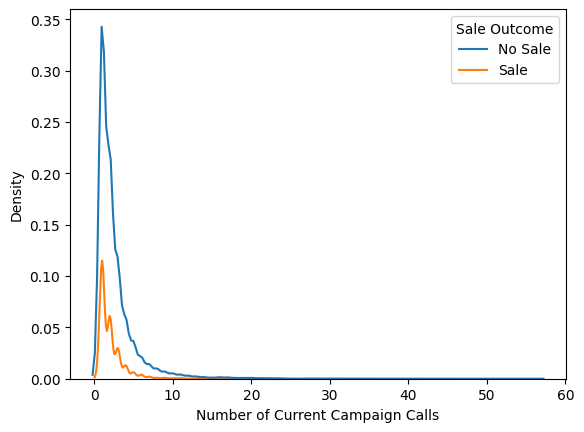

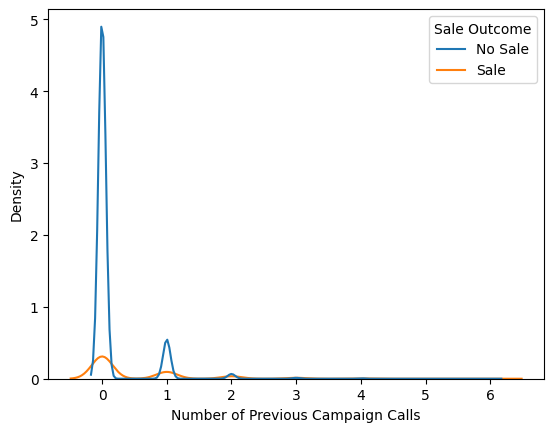

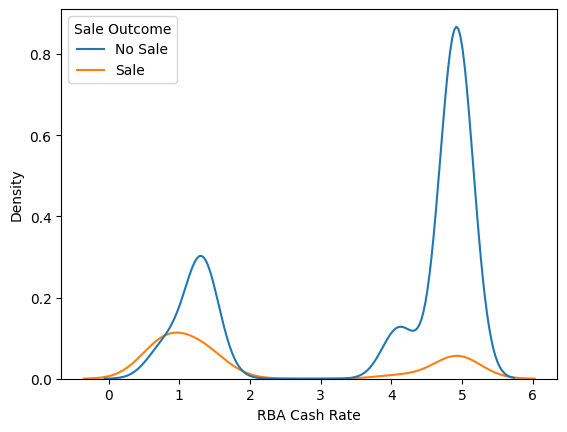

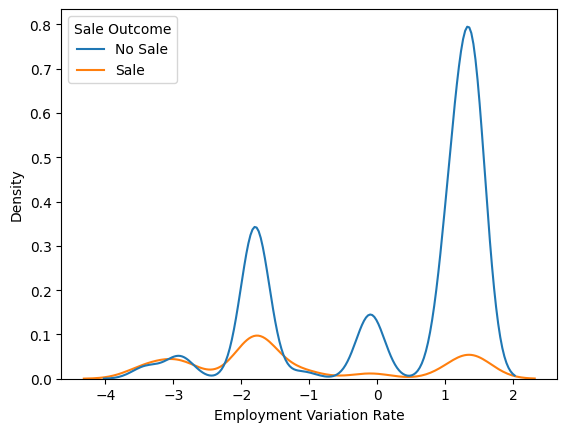

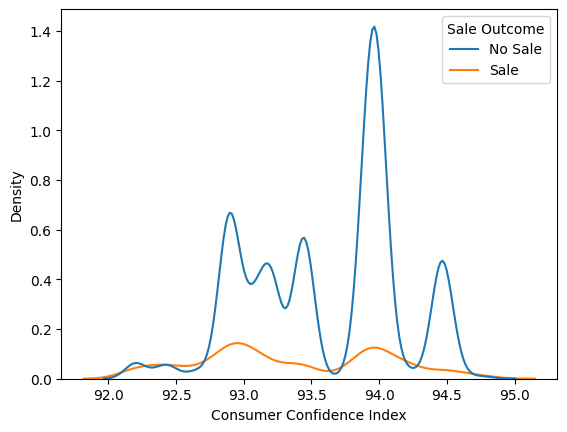

In [ ]:
#Explore  relationships between each numeric variable and the target
for i in Numerical_data:
  plt.figure()
  ##write your code to create kdeplot for numerica data grouped by Churn
  sns.kdeplot(data=records, x=i, hue='Sale Outcome')

You can explore relationships among the non-target variables.

In [ ]:
#convert categorical variables to numerical
# Define the custom mapping
SaleOutcome_mapping = {
    'No Sale': 0,
    'Sale': 1

}
# Convert the categories to numerical values using replace()
records['Sale Outcome_num'] = records['Sale Outcome'].replace(SaleOutcome_mapping)

In [ ]:
# Define the custom mapping
Occupation_mapping = {
    'Clerical and administrative': 2,
    'Community and personal service': 2,
    'Entrepreneur': 2,
    'Housekeeper': 2,
    'Labourer': 2,
    'Manager': 2,
    'Prefer not to say': 0,
    'Retired': 1,
    'Self-employed': 2,
    'Student': 1,
    'Technicians and Trades': 2,
    'Unemployed': 1
}
# Convert the categories to numerical values using replace()
records['Occupation_num'] = records['Occupation'].replace(Occupation_mapping)

In [ ]:
# Define the custom mapping
Bankacc_mapping = {
    'Yes': 1,
    'No': 0
}
# Convert the categories to numerical values using replace()
records['Has Other Bank Account_num'] = records['Has Other Bank Account'].replace(Bankacc_mapping)

In [ ]:
# Define the custom mapping
Lcontactdirect_mapping = {
    'Inbound': 1,
    'Outbound': 0
}
# Convert the categories to numerical values using replace()
records['Last Contact Direction_num'] = records['Last Contact Direction'].replace(Lcontactdirect_mapping)

In [ ]:
# Define the custom mapping
LContactMon_mapping = {
    'March': 0,
    'April': 0,
    'May': 0,
    'June': 1,
    'July': 1,
    'August': 1,
    'September': 2,
    'October': 2,
    'November': 2,
    'December': 2

}
# Convert the categories to numerical values using replace()
records['Last Contact Month_num'] = records['Last Contact Month'].replace(LContactMon_mapping)

In [ ]:
# Define the custom mapping
PreCamOutcome_mapping = {
    'No Sale': 0,
    'Sale': 1,
    'Nonexistent': 2

}
# Convert the categories to numerical values using replace()
records['Previous Campaign Outcome_num'] = records['Previous Campaign Outcome'].replace(PreCamOutcome_mapping)

In [ ]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22940 entries, 0 to 22939
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                22940 non-null  int64  
 1   Qualification                      22940 non-null  object 
 2   Occupation                         22940 non-null  object 
 3   Marital Status                     22940 non-null  object 
 4   Home Mortgage                      22940 non-null  object 
 5   Personal Loan                      22940 non-null  object 
 6   Has Other Bank Account             22940 non-null  object 
 7   Last Contact Direction             22940 non-null  object 
 8   Last Contact Duration              22940 non-null  float64
 9   Last Contact Month                 22940 non-null  object 
 10  Last Contact Weekday               22940 non-null  object 
 11  Number of Current Campaign Calls   22940 non-null  int

In [ ]:
#using seaborn https://seaborn.pydata.org/generated/seaborn.histplot.html
# Get the numerical variables from the dataset
num_variables = records.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print the list of numerical variables
print("Numerical Variables:", num_variables)

Numerical Variables: ['Age', 'Last Contact Duration', 'Number of Current Campaign Calls', 'Number of Previous Campaign Calls', 'RBA Cash Rate', 'Employment Variation Rate', 'Consumer Confidence Index', 'Sale Outcome_num', 'Occupation_num', 'Has Other Bank Account_num', 'Last Contact Direction_num', 'Last Contact Month_num', 'Previous Campaign Outcome_num']


**Multi-variate analysis**

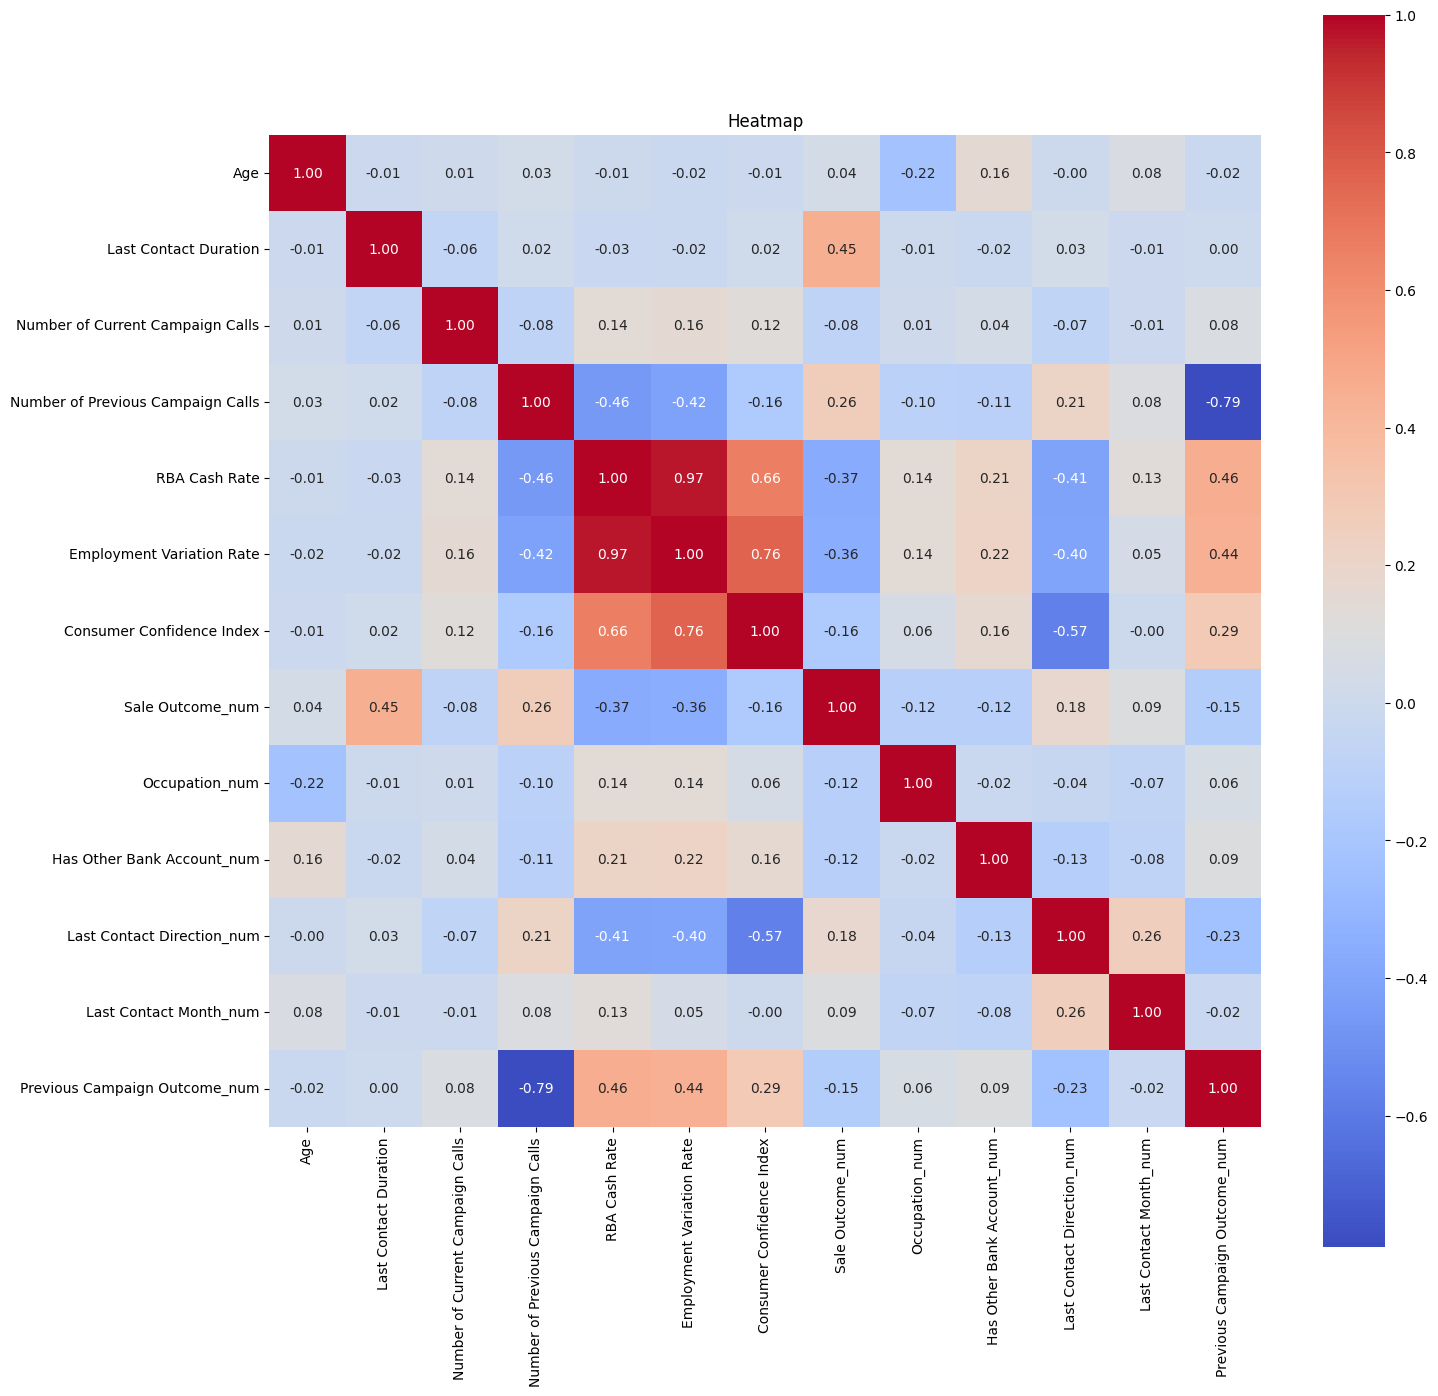

In [ ]:
##write your code to display a heatmap for data=records[nums].corr(), cmap="Blues" or cmap='crest'
#generate heatmaps to explore relationships
plt.figure(figsize=(16, 16))
sns.heatmap(records[num_variables].corr(), square=True, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Heatmap')
plt.show()

### **Data preparation**
* Data conversion
* Feature selection
* Target specification
* Data spliting
* Data scaling (X_train and X-test)

**Data conversation**

In [ ]:
##write your code to display the top 5 records, hint: use head()
X=records.select_dtypes(include=['int64', 'float64']).drop('Sale Outcome_num', axis=1)
y=records['Sale Outcome_num']
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Sale Outcome_num, dtype: int64

**Data spliting**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
##write your code to split the data into X_train, X_test, y_train, y_test Hint: use train_test_split(X, y, test_size=0.35, stratify = y, random_state=2023 )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=2024 )


**Data normalisation/scaling**

In [ ]:
#import scaler
from sklearn.preprocessing import StandardScaler

In [ ]:
# Normalize the features using StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

## **2.3. KNN Classifier Model building**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #Import KNN classifier class
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# Train a KNN model
k = 15 # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k, p=2)

##write your code to fit the knn with scaled X_train and y_train
knn.fit(X_train_scaled, y_train)

##write your code to make predictions on the SCALED testing set
y_pred = knn.predict(X_test_scaled)


Note:

* If p = 1, the distance metric becomes the Manhattan distance (also known as the L1 norm).
* If p = 2, the distance metric becomes the Euclidean distance (also known as the L2 norm).

## **2.4. Performance Evaluation**
* Classification report
* Confusion matrix
* ROC and AUC

### **Classification report**

In [ ]:
# Print the classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5266  337]
 [ 499  780]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      5603
           1       0.70      0.61      0.65      1279

    accuracy                           0.88      6882
   macro avg       0.81      0.77      0.79      6882
weighted avg       0.87      0.88      0.88      6882



In [ ]:
#get predicted probabilities for the main class
y_pred_probs_norm = knn.predict_proba(X_test_scaled)
y_pred_probs_norm = y_pred_probs_norm[:, 1]
print(y_pred_probs_norm)

[0.66666667 0.         0.         ... 0.         0.93333333 0.66666667]


### **ROC curve and AUC**

AUC: 0.919


<Axes: >

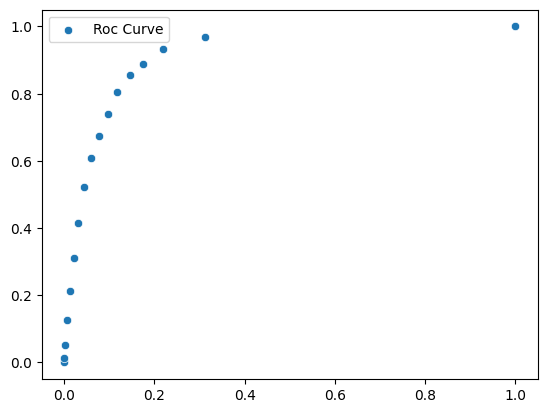

In [ ]:
#get fpr and tpr and plot the ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs_norm)
print('AUC:', '%.3f' % metrics.auc(fpr, tpr))
sns.scatterplot(x=fpr, y=tpr, label='Roc Curve')

In [ ]:
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred, 'Probability':y_pred_probs_norm})
inspection.head(10)

,Actual,Predicted,Probability
415,0,1,0.666667
17800,0,0,0.000000
15000,0,0,0.000000
15494,0,0,0.000000
265,0,0,0.066667
21854,1,1,0.533333
21788,1,1,0.866667
15744,0,0,0.000000
16331,0,0,0.000000
14329,0,0,0.066667


### **Find the best threshold**
Find the best threshold using the thresholds in ROC curve

In [ ]:
#In the previous lab we learned to optimise the threshold based on the accuracy score
from sklearn.metrics import accuracy_score
# Find the best threshold based on accuracy
accuracy = []
for threshold in thresholds:
    y_pred_t = [1 if prob >= threshold else 0 for prob in y_pred_probs_norm]
    accuracy.append(accuracy_score(y_test, y_pred_t))
best_threshold = thresholds[accuracy.index(max(accuracy))]

print(best_threshold)

0.5333333333333333


In [ ]:
#However, in imbalanced class classification, we may consider f1_score or recall
from sklearn.metrics import f1_score
# Find the best threshold based on F1 score
f1 = []
for threshold in thresholds:
    y_pred_t = [1 if prob >= threshold else 0 for prob in y_pred_probs_norm]
    f1.append(f1_score(y_test, y_pred_t))
best_threshold = thresholds[f1.index(max(f1))]

print(best_threshold)

0.3333333333333333


In [ ]:
#get predicted probabilities for best threshold
y_pred_best = (y_pred_probs_norm >= best_threshold).astype(bool)

print(y_pred_best)



[ True False False ... False  True  True]


In [ ]:
##write your code to print confusion matrix and classification_report for the best threshold
#Hint: using y_pred_best
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))



[[4945  658]
 [ 250 1029]]
              precision    recall  f1-score   support

           0       0.95      0.88      0.92      5603
           1       0.61      0.80      0.69      1279

    accuracy                           0.87      6882
   macro avg       0.78      0.84      0.80      6882
weighted avg       0.89      0.87      0.87      6882



In [ ]:
##write your code to print confusion matrix and classification_report for y_pred
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))




[[5266  337]
 [ 499  780]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      5603
           1       0.70      0.61      0.65      1279

    accuracy                           0.88      6882
   macro avg       0.81      0.77      0.79      6882
weighted avg       0.87      0.88      0.88      6882



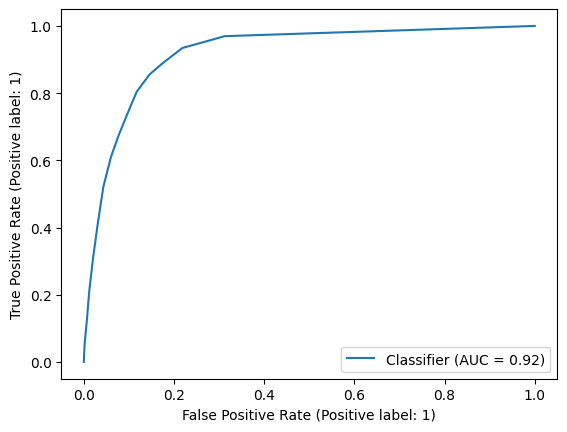

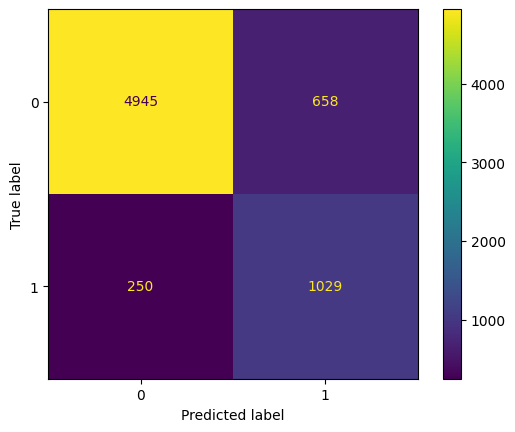

In [ ]:
#import classes to display RocCurve and Confusion Matrix, read example from the website and try on your own
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

RocCurveDisplay.from_predictions(y_test, y_pred_probs_norm)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best)
plt.show()


You can plot the best_threshold to visualise it

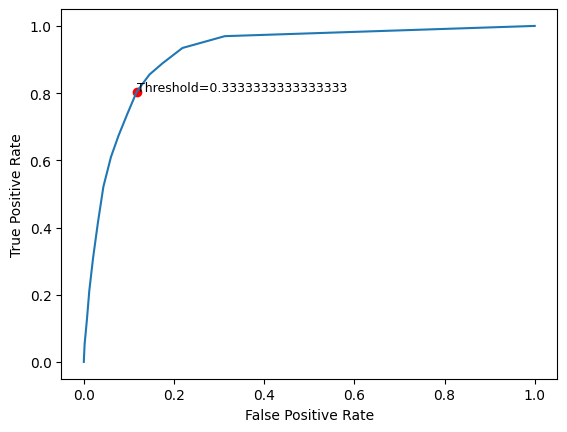

In [ ]:
# Compute the ROC curve
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_probs_norm)

# Find the index of the threshold that corresponds to the best threshold
best_threshold_idx = (abs(roc_thresholds - best_threshold)).argmin()

# Plot the ROC curve
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.scatter(fpr[best_threshold_idx], tpr[best_threshold_idx], color='red') # Mark the best threshold
plt.text(fpr[best_threshold_idx], tpr[best_threshold_idx], f'Threshold={best_threshold}', fontsize=9)
plt.show()

## **2.5. Optimising k**
**Optimise k based on accuracy**

Best k value: 16
Best accuracy: 0.880
F1 score for best accuracy: 0.641


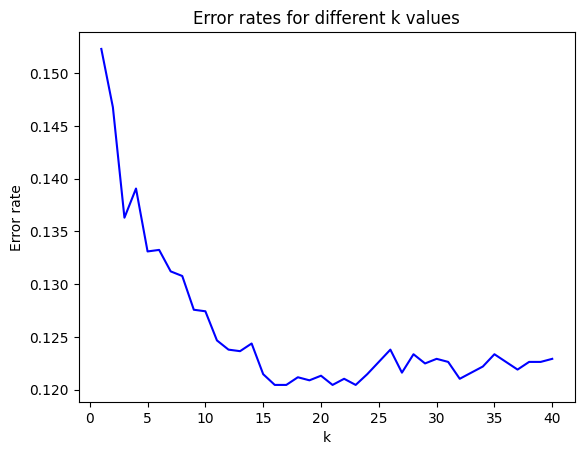

In [ ]:
# Define a list of k values to test
k_values = list(range(1, 41))

# Train and evaluate KNN classifiers with different k values

best_k=0
best_accuracy=0
best_f1=0
accuracy_scores = []
accuracy = 0
error_rate=1-accuracy
error_rates=[]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_k=knn.predict(X_test_scaled)
    accuracy = knn.score(X_test_scaled, y_test)
    accuracy_scores.append(accuracy)
    error_rates.append(1-accuracy)
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy
        best_f1 = metrics.f1_score(y_test, y_pred_k)

# Find the best k value with highest accuracy score
#best_k = k_values[np.argmax(accuracy_scores)]
print(f"Best k value: {best_k}")
print(f"Best accuracy: {best_accuracy:.3f}")
print(f"F1 score for best accuracy: {best_f1:.3f}")

# Plot k values against accuracy scores
#plt.plot(k_values, accuracy_scores, color='red')
plt.xlabel('k')
plt.ylabel('Error rate')
plt.title('Error rates for different k values')
plt.plot(k_values, error_rates, color='blue')
plt.show()

**Optimise k based on f1_score**

Best k value: 17
Best F1 score: 0.652
Accuracy for Best F1 score: 0.880


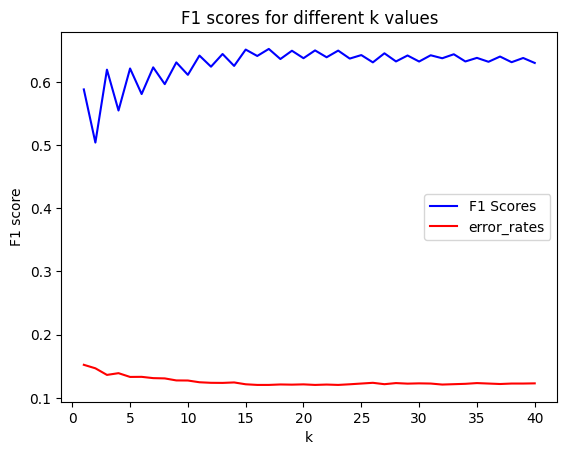

In [ ]:
# Define a list of k values to test
k_values = list(range(1, 41))

# Train and evaluate KNN classifiers with different k values
best_k=0
best_f1=0
best_accuracy=0
f1_scores = []
f1 = 0
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_k=knn.predict(X_test_scaled)
    f1 = metrics.f1_score(y_test, y_pred_k)
    f1_scores.append(f1)
    accuracy_k=metrics.accuracy_score(y_test, y_pred_k)
    if ((f1 > best_f1) ):
        best_k = k
        best_f1 = f1
        best_accuracy = metrics.accuracy_score(y_test,y_pred_k)

# Find the best k value with highest f1 score
#best_k = k_values[np.argmax(accuracy_scores)]
print(f"Best k value: {best_k}")
print(f"Best F1 score: {best_f1:.3f}")
print(f"Accuracy for Best F1 score: {best_accuracy:.3f}")

# Plot k values against accuracy scores
#plt.plot(k_values, accuracy_scores, color='red')
plt.xlabel('k')
plt.ylabel('F1 score')
plt.title('F1 scores for different k values')
plt.plot(k_values, f1_scores, color='blue', label='F1 Scores')
plt.plot(k_values, error_rates, color='red', label='error_rates')
plt.legend()
plt.show()

# **3. Model: ANN**


## **3.1 Loading data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
##write your code to define your predictors and label
X=records.select_dtypes(include=['int64', 'float64']).drop('Sale Outcome_num', axis=1)
y=records['Sale Outcome_num']

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=2024)  # 75% training and 25% testing

#inspect the split datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(17205, 12)
(17205,)
(5735, 12)
(5735,)


In [ ]:
print((y_train==1).sum())
print((y_test==1).sum())

3197
1066


## **3.2. Data Preparation, Exploration and Visualisation**

In [ ]:
#import classes and functions
from sklearn.neural_network import MLPClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
# create an MLP classifier with 2 hidden layers
ann_clf = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=1000, random_state=2024, early_stopping=True)


In [ ]:
# train the classifier on the training data
ann_clf.fit(X_train, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(32, 16), max_iter=1000,
              random_state=2024)

In [ ]:
# Write code to make predictions using the classifier on the testing data
y_pred = ann_clf.predict(X_test)

In [ ]:
#get predicted probabilities for the main class
y_pred_probs = ann_clf.predict_proba(X_test)
y_pred_probs = y_pred_probs[:, 1]

## **3.4. Performance Evaluation**


In [ ]:
#print confusion matrix and evaluation report
cm=confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[4193  476]
 [ 290  776]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      4669
           1       0.62      0.73      0.67      1066

    accuracy                           0.87      5735
   macro avg       0.78      0.81      0.79      5735
weighted avg       0.88      0.87      0.87      5735



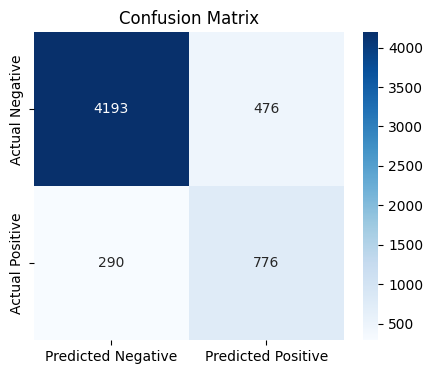

In [ ]:
# Display confusion matrix
df_cm = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
plt.figure(figsize=(5,4))
plt.title('Confusion Matrix')
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')
plt.show()

AUC: 0.918


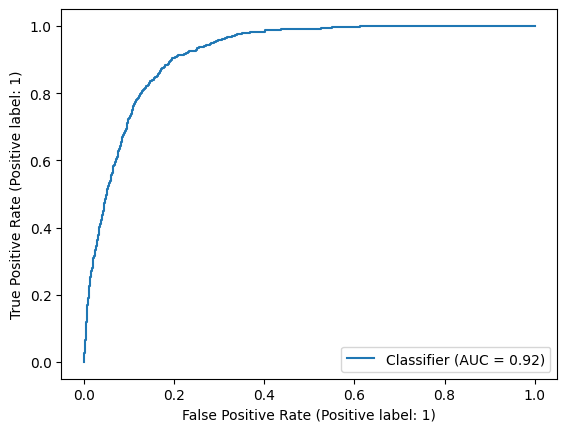

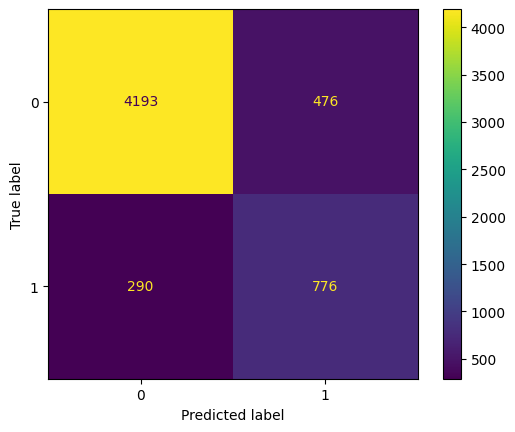

In [ ]:
#import classes to display RocCurve and Confusion Matrix, read example from the website and try on your own
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

fpr_mlp, tpr_mlp, thresholds = roc_curve(y_test, y_pred_probs)
auc_mlp=metrics.auc(fpr_mlp, tpr_mlp)
print('AUC:', '%.3f' % auc_mlp)

#RocCurveDisplay.from_estimator(logreg,X_test, y_test)
RocCurveDisplay.from_predictions(y_test, y_pred_probs)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [ ]:
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred, f'Probability: %5.3f':y_pred_probs})
inspection=pd.concat([X_test,inspection], axis=1)
inspection.sample(10)

,Age,Last Contact Duration,Number of Current Campaign Calls,Number of Previous Campaign Calls,RBA Cash Rate,Employment Variation Rate,Consumer Confidence Index,Occupation_num,Has Other Bank Account_num,Last Contact Direction_num,Last Contact Month_num,Previous Campaign Outcome_num,Actual,Predicted,Probability: %5.3f
10475,45,157.0,3,0.0,4.963,1.4,93.444,2,0,1,1,2,0,0,6.160586e-03
20388,33,42.0,7,0.0,4.959,1.4,94.465,2,0,0,1,2,0,0,1.338608e-06
8851,54,28.0,10,0.0,4.964,1.4,93.444,2,0,1,1,2,0,0,3.086214e-07
2744,58,312.0,1,0.0,4.857,1.1,93.994,2,0,0,0,2,0,0,7.989753e-02
15026,34,686.0,1,0.0,4.120,-0.1,93.200,2,0,1,2,2,1,1,8.829637e-01
15395,27,141.0,1,0.0,1.406,-1.8,93.075,1,0,0,0,2,0,0,9.704614e-02
13007,38,353.0,1,0.0,4.153,-0.1,93.200,2,0,1,2,2,0,0,3.146901e-01
4444,53,736.0,2,0.0,4.962,1.4,93.918,2,0,1,1,2,0,1,7.705817e-01
19763,39,84.0,1,0.0,4.153,-0.1,93.200,2,0,1,2,2,0,0,8.287554e-03
5169,28,404.0,1,0.0,4.857,1.1,93.994,2,0,0,0,2,0,0,1.612082e-01


In [ ]:
#Model evaluation
print("Accuracy: ", '%.3f' % metrics.accuracy_score(y_test,y_pred))
print("Precision: ", '%.3f' % metrics.precision_score(y_test,y_pred))
print("Recall: ", '%.3f' % metrics.recall_score(y_test,y_pred))
print("F1: ", '%.3f' % metrics.f1_score(y_test,y_pred))

Accuracy:  0.866
Precision:  0.620
Recall:  0.728
F1:  0.670


# **4. Cluster Model**



In [ ]:
from sklearn.metrics import mutual_info_score

In [ ]:
mi_scores = {}

# Loop through each categorical feature and calculate MI score
for cat in Categorical_data:
    mi_scores[cat] = mutual_info_score(records[cat], records['Sale Outcome'])

# Sort features by their MI scores
sorted_scores = sorted(mi_scores.items(), key=lambda x: x[1], reverse=True)

# Display the scores
for feature, score in sorted_scores:
    print(f"{feature}: {score:.3f}")


Previous Campaign Outcome: 0.043
Last Contact Month: 0.039
Last Contact Direction: 0.018
Occupation: 0.014
Has Other Bank Account: 0.009
Qualification: 0.004
Marital Status: 0.002
Last Contact Weekday: 0.001
Home Mortgage: 0.000
Personal Loan: 0.000


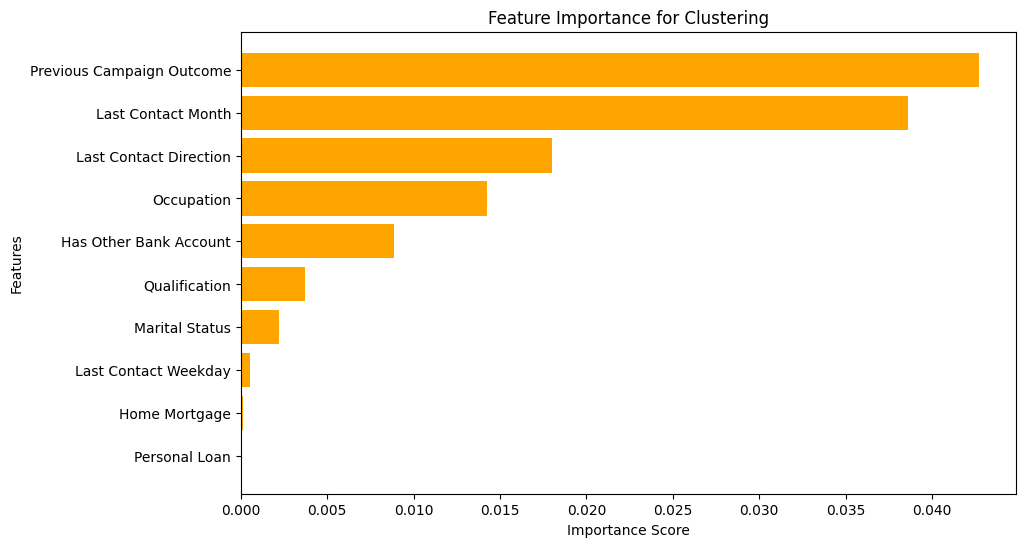

In [ ]:
features, scores = zip(*sorted_scores)
plt.figure(figsize=(10, 6))
plt.barh(features, scores, color='orange')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for Clustering')
plt.gca().invert_yaxis()
plt.show()

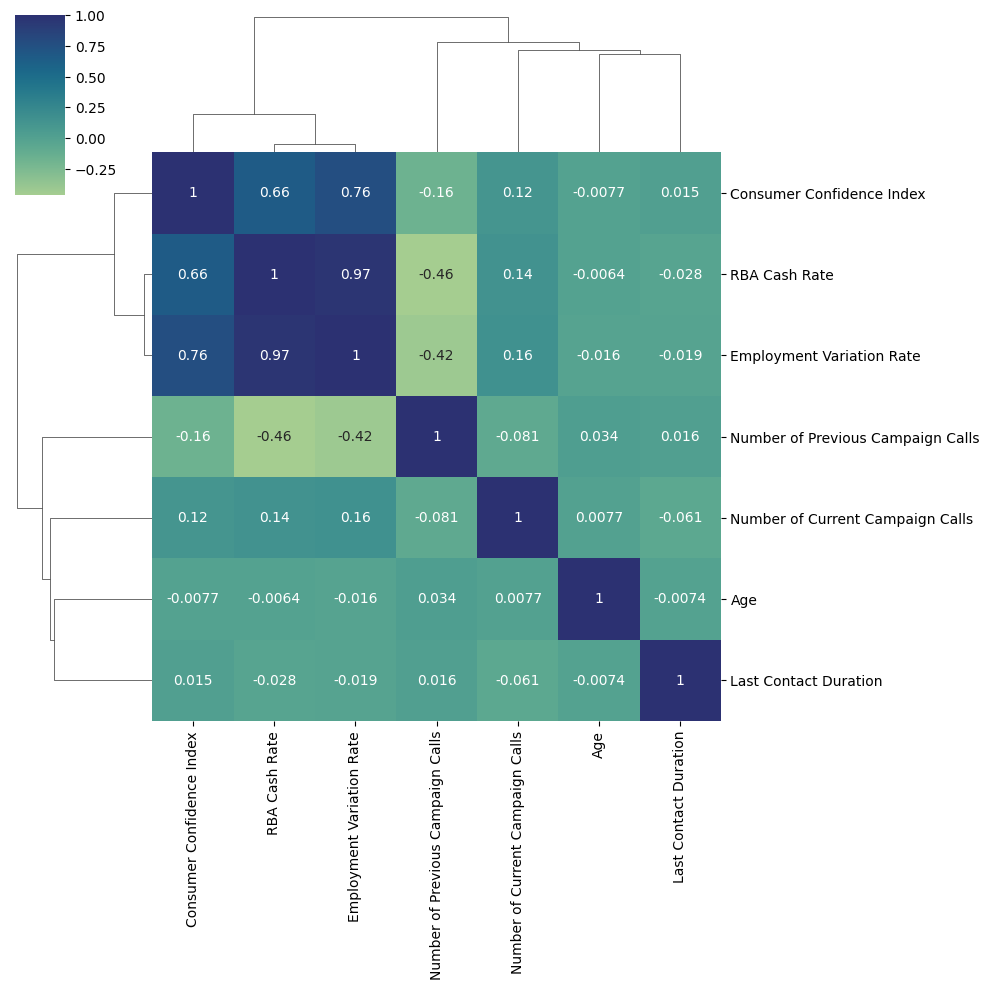

In [ ]:
sns.clustermap(data=records[Numerical_data].corr(), annot=True, cmap='crest')

In [ ]:
# Select relevant features for clustering; # you can edit this list
#Option 1, for simplicity let's start with two features
features=['Consumer Confidence Index','Number of Previous Campaign Calls','Age','Last Contact Duration','Previous Campaign Outcome_num', 'Last Contact Month_num']

X = records[features]

In [ ]:
X.describe()

,Consumer Confidence Index,Number of Previous Campaign Calls,Age,Last Contact Duration,Previous Campaign Outcome_num,Last Contact Month_num
count,22940.000000,22940.000000,22940.000000,22940.000000,22940.000000,22940.000000
mean,93.557365,0.199215,40.097602,281.823147,1.746469,0.734307
std,0.592104,0.543082,10.799192,285.375802,0.629965,0.692974
min,92.201000,0.000000,17.000000,0.000000,0.000000,0.000000
25%,93.075000,0.000000,32.000000,108.000000,2.000000,0.000000
50%,93.444000,0.000000,38.000000,192.000000,2.000000,1.000000
75%,93.994000,0.000000,47.000000,348.000000,2.000000,1.000000
max,94.767000,6.000000,98.000000,4918.000000,2.000000,2.000000


In [ ]:
#import scaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Scale the features using Min-Max Scaling
scaler = MinMaxScaler()


In [ ]:
# Features to scale
features_to_scale = ['Consumer Confidence Index','Number of Previous Campaign Calls', 'Age','Last Contact Duration','Previous Campaign Outcome_num','Last Contact Month_num' ]

# Fit and transform the features to scale on the training data
X_scaled_values = scaler.fit_transform(X)

# Create DataFrames from the scaled values
X_features_scaled = pd.DataFrame(X_scaled_values, columns=features_to_scale)
X_scaled = X_features_scaled


In [ ]:
X_scaled.describe()

,Consumer Confidence Index,Number of Previous Campaign Calls,Age,Last Contact Duration,Previous Campaign Outcome_num,Last Contact Month_num
count,22940.000000,22940.000000,22940.000000,22940.000000,22940.000000,22940.000000
mean,0.528591,0.033203,0.285156,0.057304,0.873235,0.367153
std,0.230750,0.090514,0.133323,0.058027,0.314982,0.346487
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.340608,0.000000,0.185185,0.021960,1.000000,0.000000
50%,0.484412,0.000000,0.259259,0.039040,1.000000,0.500000
75%,0.698753,0.000000,0.370370,0.070760,1.000000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# Fit K-means clustering model with a 'guessed' number of clusters
k=5
kmeans = KMeans(n_clusters=k, n_init='auto',max_iter=300, random_state=2024)

#fit kmeans with X_scaled
kmeans.fit(X_scaled)

# Add cluster labels to original dataset
records['Cluster'] = kmeans.labels_

In [ ]:
# Evaluate the model using within-cluster sum of squares (WCSS)
wcss = kmeans.inertia_
print("Within-Cluster Sum of Squares (WCSS):", '%.3f' % wcss)


Within-Cluster Sum of Squares (WCSS): 1900.457


In [ ]:
from sklearn.metrics import davies_bouldin_score

# Compute the Davies-Bouldin index
dbs = davies_bouldin_score(X_scaled, kmeans.labels_)
print("Davies Bouldin index:", '%.3f' % dbs)

Davies Bouldin index: 0.776


In [ ]:
# Compute the Silhouette score for the clustering model
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)

print('Silhouette score:', '%.3f' % silhouette_avg)

Silhouette score: 0.490


In [ ]:
#Import funtions to visualise silhouette score
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib.cm as cm

In [ ]:
#fit kmeans with X_scaled to get labels
cluster_labels = kmeans.fit_predict(X_scaled)

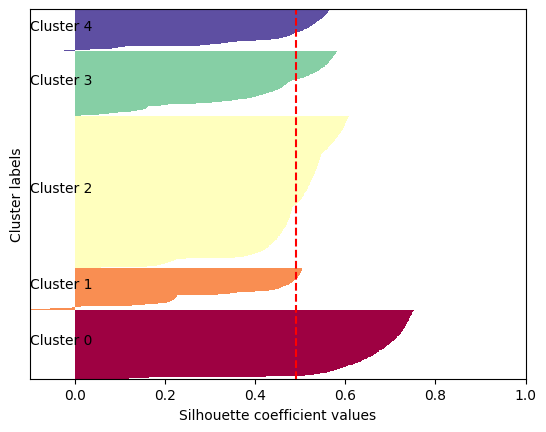

In [ ]:
# Compute silhouette scores
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

# Plot silhouette diagram
n_clusters = 5
fig, ax = plt.subplots()
y_lower, y_upper = 0, 0

# Define the colormap, options include: autumn, Spectral, viridis, plasma, cool, jet
cmap = cm.Spectral

# Create a list of evenly spaced values in the range [0, 1]
values = np.linspace(0, 1, n_clusters)

for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper += size_cluster_i
    color = cmap(values[i])
    ax.barh(range(y_lower, y_upper), ith_cluster_silhouette_values, height=1.0,
            edgecolor='none', color=color)
    ax.text(-0.1, (y_lower + y_upper) / 2, 'Cluster ' + str(i), color='black', fontsize=10)
    y_lower += size_cluster_i

ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster labels")
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
ax.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

plt.show()

In [ ]:
# Determine optimal number of clusters using the SSE metric
sse_scores = []
best_k=2
best_sse_score=4622.613
for i in range(2, 41):
  kmeans = KMeans(n_clusters=i, n_init=2)
  kmeans.fit(X_scaled)
  sse_score_i=kmeans.inertia_
  sse_scores.append(sse_score_i)
  if best_sse_score > sse_score_i:
    best_k = i
    best_sse_score = sse_score_i

print('Best k: ', best_k)
print('Best within cluster sum of squarred error score: ', '%.3f' %best_sse_score)

Best k:  40
Best within cluster sum of squarred error score:  266.436


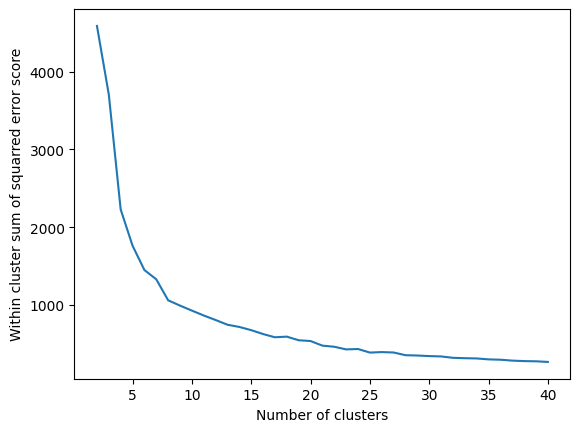

In [ ]:
# Plot the squarred scores to determine optimal number of clusters
plt.plot(range(2,41), sse_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Within cluster sum of squarred error score")
plt.show()

In [ ]:
from sklearn.metrics import davies_bouldin_score

In [ ]:
# Determine optimal number of clusters using the SSE metric
dbs_scores = []
best_k=3
best_dbs_score=1
for k in range(2, 41):
  kmeans = KMeans(n_clusters=k, n_init='auto', max_iter=300, random_state=2024)
  kmeans.fit(X_scaled)
  dbs_score_k=davies_bouldin_score(X_scaled, kmeans.labels_)
  dbs_scores.append(dbs_score_k)
  if best_dbs_score > dbs_score_k:
    best_k = k
    best_dbs_score = dbs_score_k

print('Best k: ', best_k)
print('Best Davies Bouldin index: ', '%.3f' %best_dbs_score)

Best k:  5
Best Davies Bouldin index:  0.776


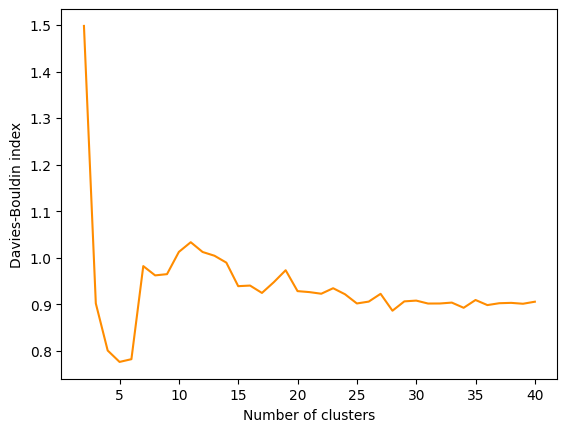

In [ ]:
# Plot the Davies-Bouldin indices to determine optimal number of clusters
plt.plot(range(2,41), dbs_scores, color='darkorange', label='Davies Bouldin index')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin index')
plt.show()

In [ ]:
# Determine optimal number of clusters using silhouette score
sil_scores = []
best_k=2
best_sil_score=0
for i in range(2, 41):
  kmeans = KMeans(n_clusters=i, n_init=2)
  kmeans.fit(X_scaled)
  sil_score_i=silhouette_score(X_scaled, kmeans.labels_)
  sil_scores.append(sil_score_i)
  if best_sil_score < sil_score_i:
    best_k = i
    best_sil_score = sil_score_i

print('Best k: ', best_k)
print('Best silhouette score: ', '%.3f' %best_sil_score)

Best k:  6
Best silhouette score:  0.517


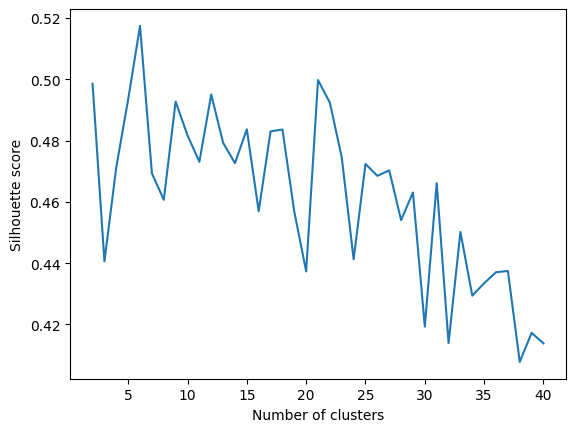

In [ ]:
# Plot the silhouette scores to determine optimal number of clusters
plt.plot(range(2,41), sil_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()



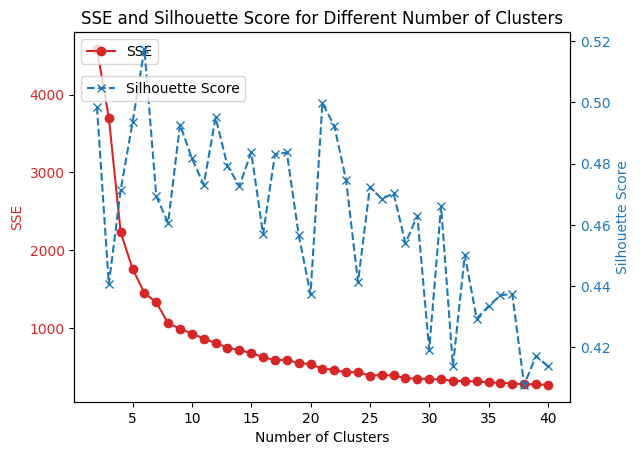

In [ ]:
# Create a figure and a set of subplots (two y-axes)
fig, ax1 = plt.subplots()

cluster_range = range(2, 41)

# Plot SSE
color = 'tab:red'
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('SSE', color=color)
ax1.plot(cluster_range, sse_scores, marker='o', label='SSE', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create the second y-axis to plot Silhouette Score
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(cluster_range, sil_scores, marker='x', linestyle='--', label='Silhouette Score', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show legend
ax1.legend(loc='upper left', bbox_to_anchor=(0.0, 1.0))
ax2.legend(loc='upper left', bbox_to_anchor=(0.0, 0.9))

# Show plot
plt.title("SSE and Silhouette Score for Different Number of Clusters")
plt.show()